# Entre Opiniones y Vuelos: Explorando la Satisfacción de los Pasajeros con Invistico Airlines

![5-star reviews icon](https://resource.gsx.com/5-star-reviews-icon.png)

### <span style="color:gray">**ÍNDICE**</span>

1) Abstract
2) La Satisfacción del Cliente en la Industria Aérea
3) Invistico Airlines 
    1. Situación actual 
    2. Loyalty and Satisfaction
    3. "Business or Pleasure"
    4. Factores en la Experiencia Aérea
    5. Tiempos de Vuelo y Retrasos
4) Prediciendo la satisfacción del cliente 
    1. Feature selection
    2. Algorithm selection
        1. Train / Test
        2. Variables Predictoras
        3. Modelo 1 - Regresión Logística
            1. Matriz de confusión
            2. Métricas derivadas de la matriz de confusión
            3. Curva ROC
        4. Modelo 2 - Random Forest
            1. Matriz de confusión
            2. Métricas derivadas de la matriz de confusión
            3. Curva ROC
        5. Conclusiones y elección del modelo
5) Conclusiones y Next Steps

### <span style="color:gray">**1. Abstract**</span>

Este proyecto de ciencia de datos se centra en mejorar la satisfacción del cliente en Invistico Airlines, una aerolínea que enfrenta desafíos significativos con un índice de satisfacción del 55%, considerablemente por debajo del objetivo del 70%. Inspirado en las tendencias y desafíos generales de la industria aérea, abordamos áreas clave, como la relación entre lealtad y satisfacción, la influencia de las clases de viaje, la importancia de servicios online y del aeropuerto, y los impactos de los tiempos de vuelo y retrasos. A través de técnicas de machine learning, buscamos anticipar las preferencias de los clientes y proponemos estrategias específicas, como la mejora de clases de viaje con niveles bajos de satisfacción y la focalización en servicios online y del aeropuerto. Al alinear estas acciones con las tendencias de la industria, aspiramos a elevar la satisfacción del cliente en Invistico Airlines y contribuir a la mejora general de la experiencia del usuario en la industria aérea.

### <span style="color:gray">**2. La Satisfacción del Cliente en la Industria Aérea**</span>
En el dinámico panorama de la industria aérea, la satisfacción del cliente se ha convertido en un elemento crucial para el éxito y la reputación de las aerolíneas. Recientemente, Aerolíneas Argentinas ha experimentado mejoras notables en su índice de satisfacción, implementando estrategias innovadoras y mejoras en sus servicios para ofrecer experiencias más gratificantes a sus pasajeros. A nivel global, diversas fuentes, como estudios de J.D. Power y análisis académicos, arrojan luz sobre las tendencias y prácticas exitosas que influyen en la percepción de los clientes hacia las aerolíneas. La implementación de buenas prácticas en la experiencia del cliente, el diseño de servicios impactante y la atención a las preferencias emergentes de los pasajeros son elementos clave que han cobrado relevancia. A través de una visión integrada de múltiples fuentes, incluida una infografía detallada, se revela un panorama completo sobre la satisfacción de los pasajeros y las estrategias que las aerolíneas están adoptando para alcanzar nuevos niveles de excelencia en el servicio al cliente.

La industria aérea enfrenta una serie de desafíos críticos que están impactando directamente en la satisfacción de los clientes. En primer lugar, los elevados costos y tarifas asociados con los servicios aéreos han emergido como la principal preocupación, generando una disminución significativa en la satisfacción general. La presión económica se intensifica, particularmente en segmentos como economy/basic economy, donde los viajeros experimentan una notoria disminución en la satisfacción, especialmente en lo relacionado con los costos y tarifas adicionales. Esta disparidad se acentúa al observar las diferentes clases de viaje, donde los viajeros de primera/business reportan niveles más altos de satisfacción en comparación con aquellos en clase económica.

Además, los problemas operativos, como retrasos de vuelos, pérdida de equipaje y restricciones en la disponibilidad de vuelos, añaden una capa adicional de complejidad a la experiencia del cliente. Mientras la industria se esfuerza por mejorar la eficiencia operativa, las condiciones de vuelo, incluida la incomodidad de los asientos y la calidad del servicio, también se han destacado como áreas de preocupación que requieren atención. Estos desafíos, combinados con el impacto de factores externos como el aumento en los precios del combustible y los costos de seguridad, subrayan la necesidad urgente de estrategias específicas y mejoras para abordar los problemas de satisfacción del cliente en la industria aérea.

### <span style="color:gray">**3. Invistico Airlines**</span>
El objetivo principal de este proyecto de ciencia de datos es buscar soluciones para mejorar la satisfacción del cliente de una aerolínea mediante el análisis detallado de diversos factores. 
Utilizando técnicas de machine learning, se busca predecir la satisfacción del cliente a través de datos históricos. La meta final es implementar estrategias y cambios específicos en áreas clave, anticipándose a posibles problemas y elevando la satisfacción del cliente a niveles deseados. Este enfoque personalizado, considerando segmentaciones por género, edad, tipo de viaje, clase de vuelo, entre otros, busca garantizar una comprensión profunda de las necesidades y expectativas de los clientes, permitiendo una mejora continua en la experiencia del usuario

La información fue suministrada por una aerolínea que, por diversos motivos, el nombre real de la empresa no se revela, adoptando en su lugar el nombre ficticio de Invistico Airlines.
La base de datos comprende información detallada de clientes que ya han experimentado sus servicios y se han recopilado opiniones de estos, junto con sus datos de vuelo.

El propósito principal de este conjunto de datos es anticipar si un cliente futuro expresaría satisfacción con los servicios, basándose en los detalles de otros parámetros. Adicionalmente, las aerolíneas buscan identificar las áreas específicas de sus servicios que requieren mayor énfasis para cultivar la satisfacción del cliente.

El desafío principal que enfrenta este proyecto reside en la insatisfacción de los usuarios de la aerolínea, evidenciada por un índice de satisfacción del 55%, que se encuentra significativamente por debajo del objetivo establecido del 70%. La tarea fundamental consiste en comprender y abordar las razones detrás de esta disparidad, con el objetivo de implementar estrategias efectivas que eleven el nivel de satisfacción de los usuarios al umbral deseado, respondiendo a la pregunta: ¿cómo aumentar el índice de satisfacción actual de los usuarios de la aerolínea para cumplir con el objetivo establecido del 70%?

La información fue extraída del conjunto de datos "Airlines Customer satisfaction - Customer satisfaction with various other factors" creado por Sayantan Jana y actualizado en 2019. Se puede encontrar el conjunto de datos en la siguiente URL: https://www.kaggle.com/datasets/sjleshrac/airlines-customer-satisfaction.

In [123]:
# Antes de empezar
import pandas as pd
import numpy as np
from colorama import Fore, Style
from tabulate import tabulate
colores = ['#0033a0', '#eb0029'] #azul y rojo
colores_satif = ['#eb0029', '#8DB600'] #rojo y verde manzana

def format_thousands(x, pos):
    return '{:,.0f}'.format(x).replace(',', '.')

import warnings
warnings.filterwarnings("ignore", category=UserWarning, module="seaborn") # Desactivar advertencias específicas

# Importo el dataset
print(Style.BRIGHT+Fore.LIGHTRED_EX+'¿Qué información tiene el dataset?'+Style.RESET_ALL)
df_airline = pd.read_csv("C:\\Users\\Flori\\CODERHOUSE\\airlinesatisfaction.csv")  
df = df_airline.sort_values(by='satisfaction', ascending=False)
print(df.info())

print()

# Información de cada campo object
print(Style.BRIGHT+Fore.LIGHTRED_EX+'Datos en cada campo object'+Style.RESET_ALL)

# Cambio el formato del campo object
df['satisfaction'] = df['satisfaction'].str.title()
df['Customer Type'] = df['Customer Type'].str.title()
df['Type of Travel'] = df['Type of Travel'].str.title()
df['Class'] = df['Class'].str.title()
satisf = df['satisfaction'].unique()
cust_type = df['Customer Type'].unique()
type_travel = df['Type of Travel'].unique()
cust_class = df['Class'].unique()
print('- Satisfaction: ',satisf)
print('- Customer Type: ',cust_type)
print('- Type of Travel: ',type_travel)
print('- Class: ',cust_class)

# Reemplazo los datos faltantes por cero que es la mediana del campo por la naturaleza de los datos
df['Arrival Delay in Minutes'] = df['Arrival Delay in Minutes'].fillna(df['Arrival Delay in Minutes'].mean())

#Creo una columna satisfaccion binaria que indica 1 si la respuesta es satisfied y 0 en caso contrario para poder manipular mas facil los datos
satisf_binaria = df['satisfaction'].apply(lambda x: 1 if x == 'Satisfied' else 0)
df['satisf_binaria'] = satisf_binaria


¿Qué información tiene el dataset?
<class 'pandas.core.frame.DataFrame'>
Index: 129880 entries, 0 to 129879
Data columns (total 23 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   satisfaction                       129880 non-null  object 
 1   Gender                             129880 non-null  object 
 2   Customer Type                      129880 non-null  object 
 3   Age                                129880 non-null  int64  
 4   Type of Travel                     129880 non-null  object 
 5   Class                              129880 non-null  object 
 6   Flight Distance                    129880 non-null  int64  
 7   Seat comfort                       129880 non-null  int64  
 8   Departure/Arrival time convenient  129880 non-null  int64  
 9   Food and drink                     129880 non-null  int64  
 10  Gate location                      129880 non-null  int64  
 11  Inflight 

In [12]:
print(Style.BRIGHT+Fore.LIGHTRED_EX+'Descripción de cada campo'+Style.RESET_ALL)
df.describe()

Descripción de cada campo


Age  Flight Distance   Seat comfort  \
count  129880.000000    129880.000000  129880.000000   
mean       39.427957      1981.409055       2.838597   
std        15.119360      1027.115606       1.392983   
min         7.000000        50.000000       0.000000   
25%        27.000000      1359.000000       2.000000   
50%        40.000000      1925.000000       3.000000   
75%        51.000000      2544.000000       4.000000   
max        85.000000      6951.000000       5.000000   

       Departure/Arrival time convenient  Food and drink  Gate location  \
count                      129880.000000   129880.000000  129880.000000   
mean                            2.990645        2.851994       2.990422   
std                             1.527224        1.443729       1.305970   
min                             0.000000        0.000000       0.000000   
25%                             2.000000        2.000000       2.000000   
50%                             3.000000        3.000000       3.000000   
75%                             4.000000        4.000000       4.000000   
max                             5.000000        5.000000       5.000000   

       Inflight wifi service  Inflight entertainment  Online support  \
count          129880.000000           129880.000000   129880.000000   
mean                3.249130                3.383477        3.519703   
std                 1.318818                1.346059        1.306511   
min                 0.000000                0.000000        0.000000   
25%                 2.000000                2.000000        3.000000   
50%                 3.000000                4.000000        4.000000   
75%                 4.000000                4.000000        5.000000   
max                 5.000000                5.000000        5.000000   

       Ease of Online booking  On-board service  Leg room service  \
count           129880.000000     129880.000000     129880.000000   
mean                 3.472105          3.465075          3.485902   
std                  1.305560          1.270836          1.292226   
min                  0.000000          0.000000          0.000000   
25%                  2.000000          3.000000          2.000000   
50%                  4.000000          4.000000          4.000000   
75%                  5.000000          4.000000          5.000000   
max                  5.000000          5.000000          5.000000   

       Baggage handling  Checkin service    Cleanliness  Online boarding  \
count     129880.000000    129880.000000  129880.000000    129880.000000   
mean           3.695673         3.340807       3.705759         3.352587   
std            1.156483         1.260582       1.151774         1.298715   
min            1.000000         0.000000       0.000000         0.000000   
25%            3.000000         3.000000       3.000000         2.000000   
50%            4.000000         3.000000       4.000000         4.000000   
75%            5.000000         4.000000       5.000000         4.000000   
max            5.000000         5.000000       5.000000         5.000000   

       Departure Delay in Minutes  Arrival Delay in Minutes  satisf_binaria  
count               129880.000000             129880.000000   129880.000000  
mean                    14.713713                 15.091129        0.547328  
std                     38.071126                 38.407410        0.497757  
min                      0.000000                  0.000000        0.000000  
25%                      0.000000                  0.000000        0.000000  
50%                      0.000000                  0.000000        1.000000  
75%                     12.000000                 13.000000        1.000000  
max                   1592.000000               1584.000000        1.000000

In [14]:

import statsmodels.formula.api as sm
import statsmodels.api as sma
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from scipy.stats import skew
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, auc



#### <span style="color:gray">**3.1. Situación actual**</span>
En Invistico servicio overall es bueno dado que hay más usuarios satisfechos (55%) que insatisfechos (45%). Tomando el assumption de que la aerolínea quiere conseguir un mínimo de 70% de usuarios satisfechos, hay mucho por hacer, estando 15 p.p. por debajo del objetivo.
Por otro lado, las mujeres suelen estar más satisfechas que los hombres.

Las edad media en cada una de los estados de satisfacción ronda los 40 años, dato que coincide con la edad media y la moda de toda la base. Por ende, este dato no estaría impactando gravemente en el criterio. Los valores se encuentran dispersos dado que el coeficiente de variación es superior al 20% en ambos estados de satisfacción, sin embargo, el coeficiente de asimetría de los datos para ambos estados se acerca al 0, por lo que hay una concentración de usuarios cercanos a los 40 años.

Observando la distribución por sexo y satisfacción, la mayor cantidad de mujeres satisfechas se encuentran entre los 40 y 60 años, mientras que la mayoría de las insatisfechas están entre los 20 y los 40 años. Para el caso de los hombres se ve un comportamiento similar, sin embargo, los usuarios insatisfechos se encuentran más dispersos, encontrándose una gran parte por encima de los 40 años.

Satisfacción
satisfaction
Satisfied       54.7%
Dissatisfied    45.3%
Name: count, dtype: object

Porcentaje de satisfechos por Sexo
Gender
Female    65.1%
Male      44.0%
Name: satisf_binaria, dtype: object

Hay una diferencia de 21 p.p. entre sexos



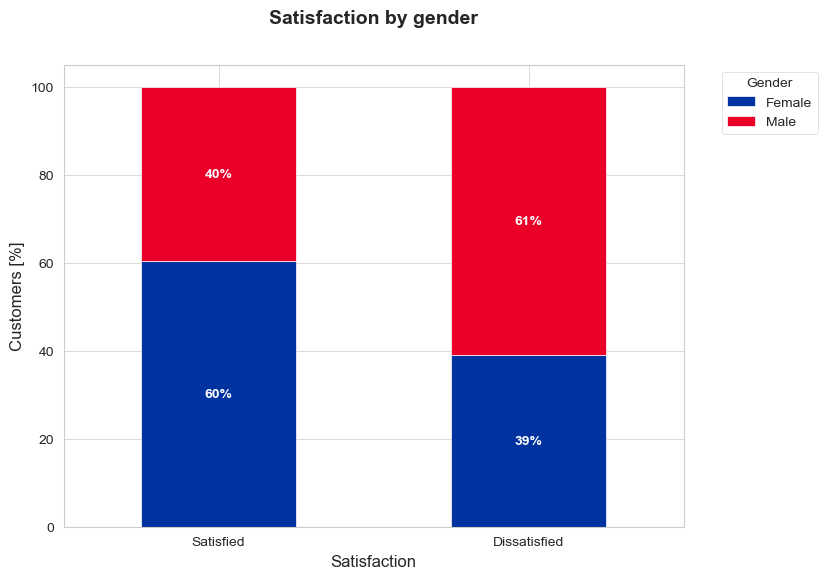

In [13]:
# Antes de empezar
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
mpl.style.use('bmh')
from scipy.stats import chi2_contingency
from matplotlib.ticker import FuncFormatter

#Me traigo la satisfaccion
print(Style.BRIGHT+Fore.LIGHTRED_EX+'Satisfacción'+Style.RESET_ALL)
satisf = df['satisfaction'].value_counts() / df['satisfaction'].count() * 100
print(satisf.map('{:.1f}%'.format))
print()

#Analizo la satisfaccion por sexo
print(Style.BRIGHT+Fore.LIGHTRED_EX+'Porcentaje de satisfechos por Sexo'+Style.RESET_ALL)
gender_satisfechos = df[['Gender','satisfaction','satisf_binaria']].groupby('Gender')['satisf_binaria'].mean() * 100 
print(gender_satisfechos.map('{:.1f}%'.format))
print()

gender_dif = np.diff(gender_satisfechos)[0]
print('Hay una diferencia de',abs(gender_dif.astype(int)),'p.p. entre sexos')
print()

#Creo las variables que necesito para graficar
gender_nom = df.groupby(['satisfaction', 'Gender']).size().unstack(fill_value=0)
gender_pct = gender_nom.div(gender_nom.sum(axis=1), axis=0) * 100
gender_pct_sort = gender_pct.sort_values(by='satisfaction', ascending = False)

#Grafico y contextualizo
sns.set_style("whitegrid")  

ax = gender_pct_sort.plot(kind='bar', stacked=True, figsize=(8, 6), color=colores)

plt.title("Satisfaction by gender",
fontsize = 14, fontweight = 'bold', pad = 30)
plt.xlabel('Satisfaction')
ax = plt.gca()
ax.set_xticklabels(["Satisfied", "Dissatisfied"])
plt.ylabel('Customers [%]')
plt.legend(title = 'Gender', bbox_to_anchor=(1.05, 1), loc='upper left')
ax = plt.gca()
plt.xticks(rotation=0)

for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height:.0f}%', (x + width/2, y + height/2), ha='center', va='center', fontsize=10, color='white', fontweight = 'bold')


Edades
| Satisfacción   |   Min |   Median |   Max |   Mean |   Mode |   DesvStd |   CV [%] |
|----------------+-------+----------+-------+--------+--------+-----------+----------|
| Dissatisfied   |     7 |       36 |    85 |     37 |     25 |        15 |  40.5405 |
| Satisfied      |     7 |       42 |    85 |     41 |     39 |        14 |  34.1463 |

Coeficiente de asimetría para ambos estados de satisfacción
El coeficiente de asimetría para los usuarios satisfechos es de -0.24
El coeficiente de asimetría para los usuarios insatisfechos es de 0.27



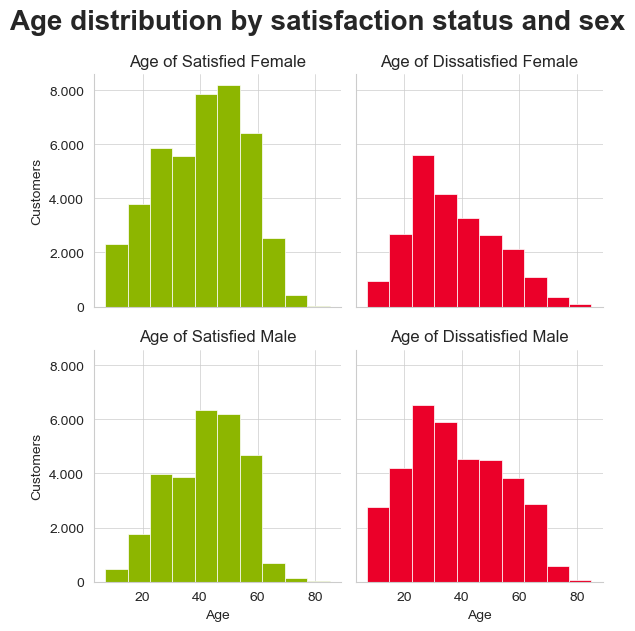

In [19]:
#Me traigo la edad media por estado de satisfacción
print(Style.BRIGHT+Fore.LIGHTRED_EX+'Edades'+Style.RESET_ALL)
age_satisf_mean = df[['satisfaction','Age']].groupby('satisfaction')['Age'].mean().astype(int)
age_satisf_max = df[['satisfaction','Age']].groupby('satisfaction')['Age'].max().astype(int)
age_satisf_min = df[['satisfaction','Age']].groupby('satisfaction')['Age'].min().astype(int)
age_satisf_median = df[['satisfaction','Age']].groupby('satisfaction')['Age'].median().astype(int)
age_satisf_desv = df[['satisfaction','Age']].groupby('satisfaction')['Age'].std().astype(int)
age_satisf_mode = df[['satisfaction','Age']].groupby('satisfaction')['Age'].apply(lambda x: x.mode().astype(int))
age_satisf_cv = age_satisf_desv/age_satisf_mean * 100

tabla_age = pd.DataFrame({
    'Satisfacción': age_satisf_mean.index,
    'Min': age_satisf_min.values,
    'Median': age_satisf_median.values,
    'Max': age_satisf_max.values,
    'Mean': age_satisf_mean.values,
    'Mode': age_satisf_mode.values,
    'DesvStd': age_satisf_desv.values,
    'CV [%]': age_satisf_cv.values,
})

tabla_formateada_age = tabulate(tabla_age, headers='keys', tablefmt='orgtbl', showindex=False)
print(tabla_formateada_age)
print()

print(Style.BRIGHT+Fore.LIGHTRED_EX+'Coeficiente de asimetría para ambos estados de satisfacción'+Style.RESET_ALL)
coeficiente_asimetria = skew(df[df['satisfaction'] == 'Satisfied']['Age'].dropna())
print('El coeficiente de asimetría para los usuarios satisfechos es de',round(coeficiente_asimetria,2))
coeficiente_asimetria_1 = skew(df[df['satisfaction'] == 'Dissatisfied']['Age'].dropna())
print('El coeficiente de asimetría para los usuarios insatisfechos es de',round(coeficiente_asimetria_1,2))
print()

#Grafico y contextualizo
sns.set_style("whitegrid")  
paleta_colores = {'Satisfied': '#8DB600' , 'Dissatisfied': '#eb0029'}

ax = sns.FacetGrid(df,
                  col = "satisfaction",  
                  row = "Gender",
                  palette = paleta_colores
                  )
ax.map(sns.histplot, "Age", bins = 10)

ax.set_titles(template="Age of {col_name} {row_name}", fontsize = 6)

ax.set_axis_labels("Age", "Customers", fontsize = 10)

plt.suptitle("Age distribution by satisfaction status and sex", fontsize=20, fontweight='bold', y=1.05)

for i, row in enumerate(ax.axes):
    for j, col in enumerate(row):
        bars = col.patches
        satisfaction_category = ax.col_names[j]
        color = paleta_colores[satisfaction_category]
        for bar in bars:
            bar.set_facecolor(color)
            
for i, row in enumerate(ax.axes):
    for j, col in enumerate(row):
        col.yaxis.set_major_formatter(FuncFormatter(format_thousands))
        
ax = plt.gca()

#### <span style="color:gray">**3.2. Loyalty and Satisfaction**</span>
Un usuario satisfecho puede volverse leal y un usuario leal debe estar satisfecho para volverse en recurrente. 

El estudio de Leon, Dixon y colaboradores (2023) sobre la satisfacción y lealtad en la industria aérea de EE. UU. revela una relación crucial entre la satisfacción del cliente y la lealtad. Los resultados destacan que la calidad del servicio, la confianza y la lealtad por compromiso impactan positivamente en la satisfacción, influyendo así en una mayor lealtad por intención de comportamiento. Se observa que la calidad del servicio, la confianza, la apertura y la amabilidad tienen efectos positivos en la satisfacción, mientras que la extraversión la afecta negativamente. Este análisis, basado en una muestra de 624 encuestados y utilizando regresión de mínimos cuadrados ordinarios, proporciona evidencia empírica de los efectos de los rasgos de personalidad, la confianza organizacional y la lealtad por compromiso en la satisfacción y lealtad del cliente en la industria aérea de EE. UU.

Para el caso de Invistico, los usuarios Loyal son el 80% de la encuesta, por esto es que deberían ser el foco de atención del análisis. Observando los resultados, los usuarios Loyal son más propensos a encontrarse satisfechos, sin embargo, los niveles de satisfacción se encuentran 8 p.p. por debajo del objetivo establecido de 70%, habiendo espacios de mejora. 

Tipo de cliente
| Tipo de Cliente   |   Frecuencia | Porcentaje   |
|-------------------+--------------+--------------|
| Loyal Customer    |       106100 | 81.7%        |
| Disloyal Customer |        23780 | 18.3%        |

Porcentaje de satisfechos por Tipo de cliente
Customer Type
Disloyal Customer    24.0%
Loyal Customer       61.6%
Name: satisf_binaria, dtype: object

Hay una diferencia de 37 p.p. entre tipo de clientes



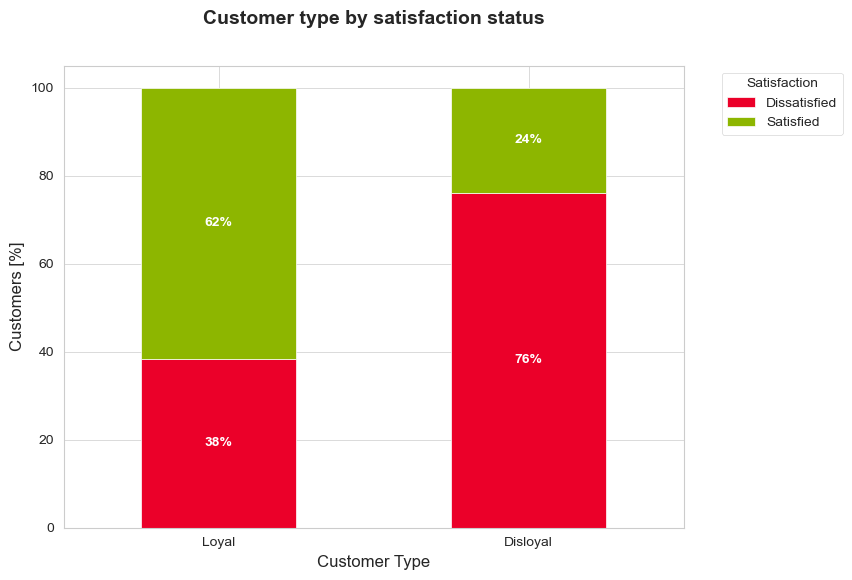

In [18]:
#Me traigo la cantidad de pasajeros en cada uno de los tipos de clientes
print(Style.BRIGHT+Fore.LIGHTRED_EX+'Tipo de cliente'+Style.RESET_ALL)
tipo_cliente_nom = df['Customer Type'].value_counts()
tipo_cliente_pct = (df['Customer Type'].value_counts() / df['Customer Type'].count() * 100).map('{:.1f}%'.format)

tabla_tipo_cliente = pd.DataFrame({
    'Tipo de Cliente': tipo_cliente_nom.index,
    'Frecuencia': tipo_cliente_nom.values,
    'Porcentaje': tipo_cliente_pct.values
})

tabla_formateada_tipo_cliente = tabulate(tabla_tipo_cliente, headers='keys', tablefmt='orgtbl', showindex=False)
print(tabla_formateada_tipo_cliente)
print()

#Analizo la satisfaccion por tipo de cliente
print(Style.BRIGHT+Fore.LIGHTRED_EX+'Porcentaje de satisfechos por Tipo de cliente'+Style.RESET_ALL)
customer_satisfechos = df[['Customer Type','satisfaction','satisf_binaria']].groupby('Customer Type')['satisf_binaria'].mean() * 100 
print(customer_satisfechos.map('{:.1f}%'.format))
print()

customer_dif = np.diff(customer_satisfechos)[0]
print('Hay una diferencia de',abs(customer_dif.astype(int)),'p.p. entre tipo de clientes')
print()

#Creo variables para graficar
customer_nom = df.groupby(['Customer Type', 'satisfaction']).size().unstack(fill_value=0)
customer_pct = customer_nom.div(customer_nom.sum(axis=1), axis=0) * 100
customer_pct_sort = customer_pct.sort_values(by='Customer Type', ascending = False)

#Grafico y contextualizo
sns.set_style("whitegrid")  

ax = customer_pct_sort.plot(kind='bar', stacked=True, figsize=(8, 6), color=colores_satif)

plt.title("Customer type by satisfaction status",
fontsize = 14, fontweight = 'bold', pad = 30)
plt.xlabel('Customer Type')
ax = plt.gca()
ax.set_xticklabels(["Loyal", "Disloyal"])
plt.ylabel('Customers [%]')
plt.legend(title = 'Satisfaction', bbox_to_anchor=(1.05, 1), loc='upper left')
ax = plt.gca()
plt.xticks(rotation=0)

for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height:.0f}%', (x + width/2, y + height/2), ha='center', va='center', fontsize=10, color='white', fontweight = 'bold')


#### <span style="color:gray">**3.3. "Business or Pleasure"**</span>
En un contexto más amplio, se destaca una tendencia decreciente en la satisfacción general de los clientes en la industria aérea, según un reciente estudio sobre la satisfacción en aerolíneas. Este declive se atribuye a desafíos significativos que enfrentan las aerolíneas, tales como el aumento de precios, restricciones en la disponibilidad de vuelos y la reducción de rutas.

Al observar más de cerca la relación entre la satisfacción del cliente y las clases de viaje, se revelan matices importantes. Aunque la satisfacción general ha disminuido, ciertos segmentos, como first/business, han experimentado una experiencia más positiva. Por otro lado, la presión económica ha impactado más fuertemente en los viajeros de economy/basic economy, quienes han experimentado una disminución significativa en la satisfacción, especialmente en aspectos relacionados con costos y tarifas.

Estos resultados sugieren que, mientras las aerolíneas enfrentan desafíos sistémicos que afectan la satisfacción general, las disparidades entre las clases de viaje resaltan la necesidad de estrategias específicas para abordar las preocupaciones de cada segmento de clientes.

Para nuestro caso, los viajes de negocio, que representan el 69% del total, son los más frecuentes. Aunque ambos servicios (Negocios y Personal) están por debajo del nivel de satisfacción deseado del 70%, el servicio de viaje Personal es el más afectado. La composición de los tipos de viaje por clase revela que la mayoría de los viajes de negocios se realizan en Business Class, explicando así por qué este grupo presenta una satisfacción superior. 

En contraste, los usuarios de clase económica (Eco), que constituyen casi el 50% de la clientela total, experimentan la satisfacción más baja, con menos del 40%. Por otro lado, los usuarios de Business (primera clase) muestran el mayor nivel de satisfacción, lo que se atribuye a la comodidad de los asientos y el servicio premium. Dado que la satisfacción de los usuarios de Business supera la meta de la aerolínea, se sugiere redirigir los esfuerzos para mejorar la satisfacción hacia las clases con niveles inferiores al objetivo en aproximadamente 30 puntos porcentuales.

Tipo de viaje
| Tipo de viaje   |   Frecuencia | Porcentaje   |
|-----------------+--------------+--------------|
| Business Travel |        89693 | 69.1%        |
| Personal Travel |        40187 | 30.9%        |

Porcentaje de satisfechos por Tipo de Viaje
Type of Travel
Business Travel    58.4%
Personal Travel    46.6%
Name: satisf_binaria, dtype: object

Hay una diferencia de 11 p.p. entre tipos de viaje



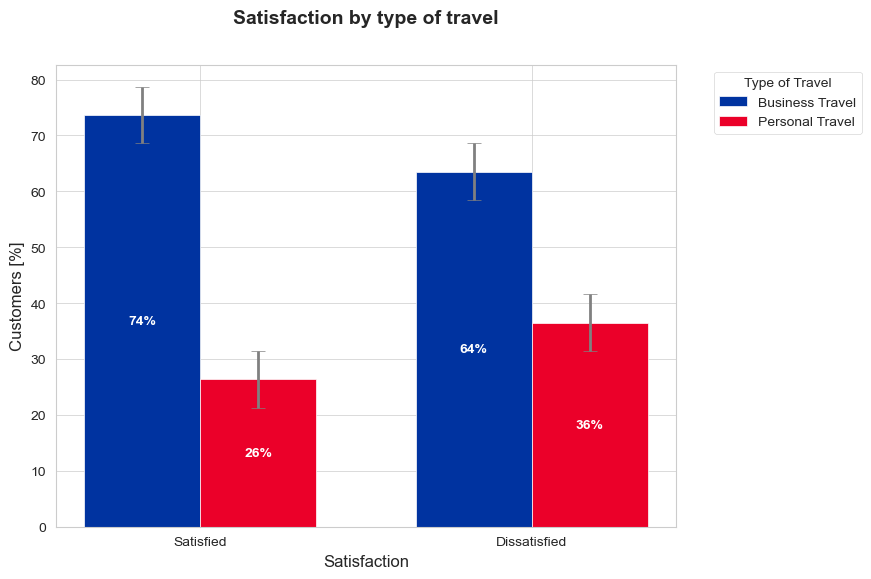

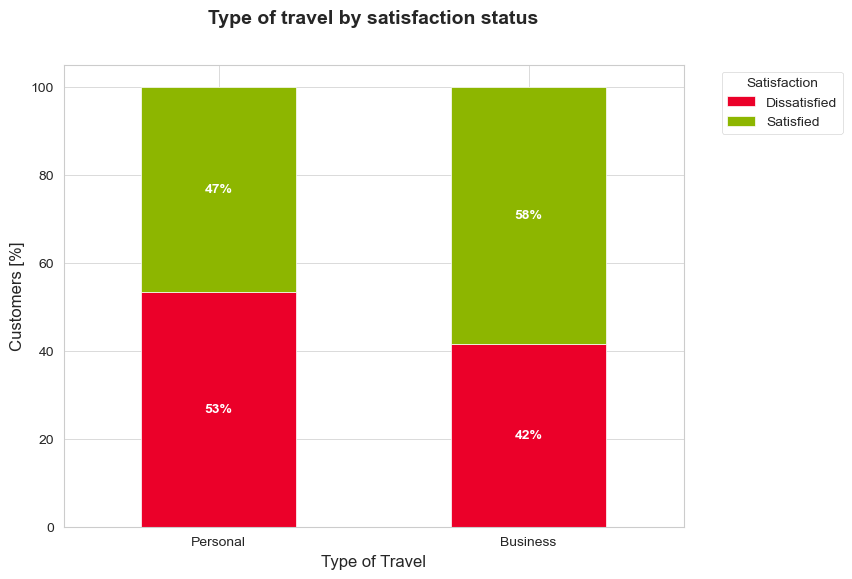

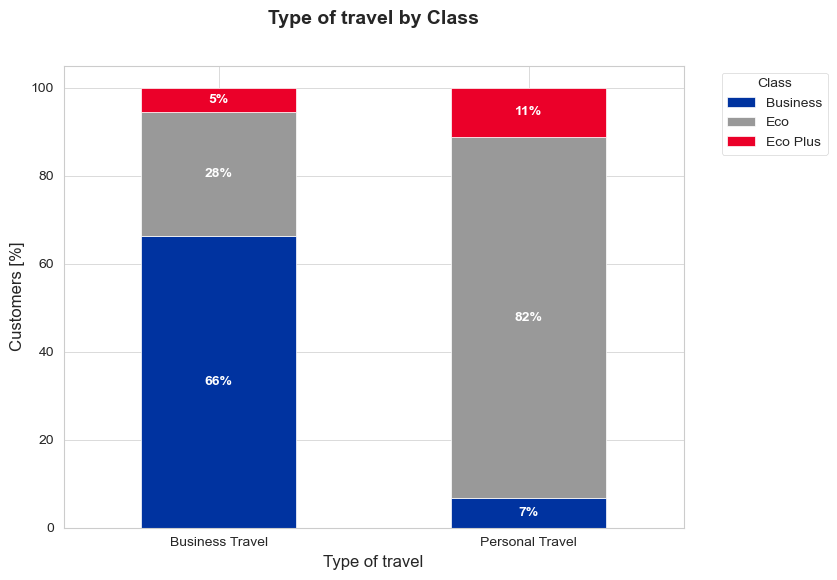

In [20]:
#Me traigo la cantidad de pasajeros en cada uno de los tipos de viajes
print(Style.BRIGHT+Fore.LIGHTRED_EX+'Tipo de viaje'+Style.RESET_ALL)
tipo_viaje_nom = df['Type of Travel'].value_counts()
tipo_viaje_pct = (df['Type of Travel'].value_counts() / df['Type of Travel'].count() * 100).map('{:.1f}%'.format)

tabla_tipo_viaje = pd.DataFrame({
    'Tipo de viaje': tipo_viaje_nom.index,
    'Frecuencia': tipo_viaje_nom.values,
    'Porcentaje': tipo_viaje_pct.values
})

tabla_formateada_tipo_viaje = tabulate(tabla_tipo_viaje, headers='keys', tablefmt='orgtbl', showindex=False)
print(tabla_formateada_tipo_viaje)
print()

#Analizo la satisfaccion por tipo de viaje
print(Style.BRIGHT+Fore.LIGHTRED_EX+'Porcentaje de satisfechos por Tipo de Viaje'+Style.RESET_ALL)
travel_satisfechos = df[['Type of Travel','satisfaction','satisf_binaria']].groupby('Type of Travel')['satisf_binaria'].mean() * 100 
print(travel_satisfechos.map('{:.1f}%'.format))
print()

travel_dif = np.diff(travel_satisfechos)[0]
print('Hay una diferencia de',abs(travel_dif.astype(int)),'p.p. entre tipos de viaje')
print()

#Creo las variables que necesito para graficar
travel_nom = df.groupby(['satisfaction', 'Type of Travel']).size().unstack(fill_value=0)
travel_pct = travel_nom.div(travel_nom.sum(axis=1), axis=0) * 100
travel_pct_sort = travel_pct.sort_values(by='satisfaction', ascending = False)

#Grafico y contextualizo
sns.set_style("whitegrid")  

fig, ax = plt.subplots(figsize=(8, 6))

bar_width = 0.35
bar_positions = np.arange(len(travel_pct_sort.index))

bars_satisfied = plt.bar(bar_positions, travel_pct_sort['Business Travel'], width=bar_width, label='Business Travel', color='#0033a0')
bars_dissatisfied = plt.bar(bar_positions + bar_width, travel_pct_sort['Personal Travel'], width=bar_width, label='Personal Travel', color= '#eb0029')

# Agrego barras de error
errors_satisfied = plt.errorbar(
    bar_positions,
    travel_pct_sort['Business Travel'],
    yerr=np.std(travel_pct_sort['Business Travel']),
    fmt='none',
    color='gray',
    capsize=5,
    capthick=0.5
)

errors_dissatisfied = plt.errorbar(
    bar_positions + bar_width,
    travel_pct_sort['Personal Travel'],
    yerr=np.std(travel_pct_sort['Personal Travel']),
    fmt='none',
    color='gray',
    capsize=5,
    capthick=0.5
)

plt.title("Satisfaction by type of travel", fontsize=14, fontweight='bold', pad=30)
plt.xlabel('Satisfaction')
plt.ylabel('Customers [%]')
plt.legend(title='Type of Travel', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(bar_positions + bar_width / 2, ["Satisfied", "Dissatisfied"])

for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height:.0f}%', (x + width/2, y + height/2), ha='center', va='center', fontsize=10, color='white', fontweight = 'bold')

plt.show()


#Creo variables para graficar la satisfacción según el tipo de viaje
travel1_nom = df.groupby(['Type of Travel', 'satisfaction']).size().unstack(fill_value=0)
travel1_pct = travel1_nom.div(travel1_nom.sum(axis=1), axis=0) * 100
travel1_pct_sort = travel1_pct.sort_values(by='Type of Travel', ascending = False)

#Grafico y contextualizo
sns.set_style("whitegrid")  

ax = travel1_pct_sort.plot(kind='bar', stacked=True, figsize=(8, 6), color=colores_satif)

plt.title("Type of travel by satisfaction status", fontsize = 14, fontweight = 'bold', pad = 30)
plt.xlabel('Type of Travel')
ax = plt.gca()
ax.set_xticklabels(["Personal", "Business"])
plt.ylabel('Customers [%]')
plt.legend(title = 'Satisfaction', bbox_to_anchor=(1.05, 1), loc='upper left')
ax = plt.gca()
plt.xticks(rotation=0)

for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height:.0f}%', (x + width/2, y + height/2), ha='center', va='center', fontsize=10, color='white', fontweight = 'bold')

# Agrupo los datos por Class y Type of Travel y cuento la cantidad de usuarios
agrupado = df.groupby(['Type of Travel','Class']).size().unstack(fill_value=0)
agrupado_pct = agrupado.div(agrupado.sum(axis=1), axis=0) * 100
custom_colors = ['#0033a0', '#999999','#eb0029']

ax = agrupado_pct.plot(kind='bar', stacked=True, figsize=(8, 6), color=custom_colors)

plt.title("Type of travel by Class", fontsize = 14, fontweight = 'bold', pad = 30)
plt.xlabel('Type of travel')
plt.ylabel('Customers [%]')
plt.legend(title='Class',  bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=0)

for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height:.0f}%', (x + width/2, y + height/2), ha='center', va='center', fontsize=10, color='white', fontweight='bold')

plt.show()


Clase de vuelo
| Clase    |   Frecuencia | Porcentaje   |
|----------+--------------+--------------|
| Business |        62160 | 47.9%        |
| Eco      |        58309 | 44.9%        |
| Eco Plus |         9411 | 7.2%         |

Porcentaje de satisfechos por Clase
Class
Business    70.9%
Eco         39.4%
Eco Plus    42.7%
Name: satisf_binaria, dtype: object

Hay una diferencia de 31 p.p. entre clases



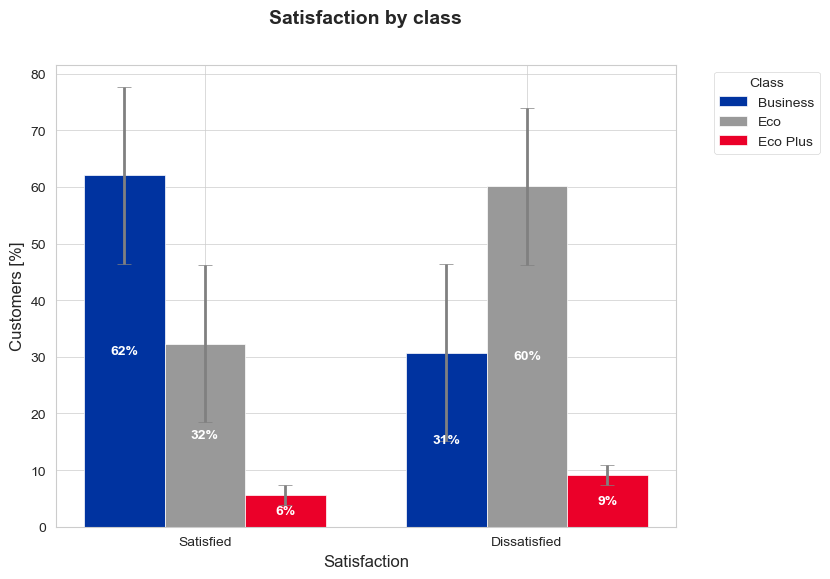

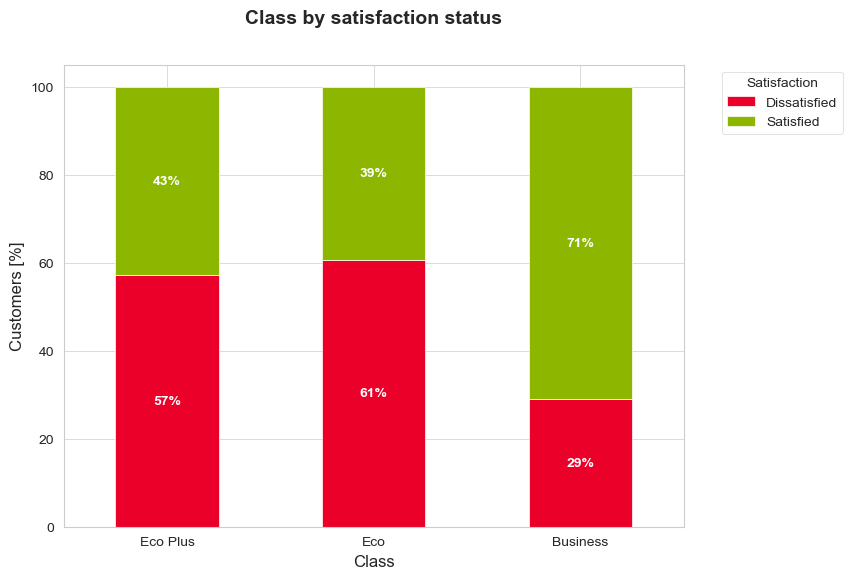

In [21]:
#Me traigo la cantidad de pasajeros en cada uno de las clases de vuelos
print(Style.BRIGHT+Fore.LIGHTRED_EX+'Clase de vuelo'+Style.RESET_ALL)
clase_nom = df['Class'].value_counts()
clase_pct = (df['Class'].value_counts() / df['Class'].count() * 100).map('{:.1f}%'.format)

tabla_clase = pd.DataFrame({
    'Clase': clase_nom.index,
    'Frecuencia': clase_nom.values,
    'Porcentaje': clase_pct.values
})

tabla_formateada_clase = tabulate(tabla_clase, headers='keys', tablefmt='orgtbl', showindex=False)
print(tabla_formateada_clase)
print()

#Analizo la satisfaccion por clase
print(Style.BRIGHT+Fore.LIGHTRED_EX+'Porcentaje de satisfechos por Clase'+Style.RESET_ALL)
class_satisfechos = df[['Class','satisfaction','satisf_binaria']].groupby('Class')['satisf_binaria'].mean() * 100 
print(class_satisfechos.map('{:.1f}%'.format))
print()

class_dif = np.diff(class_satisfechos)[0]
print('Hay una diferencia de',abs(class_dif.astype(int)),'p.p. entre clases')
print()

#Creo las variables que necesito para graficar
class_nom = df.groupby(['satisfaction', 'Class']).size().unstack(fill_value=0)
class_pct = class_nom.div(class_nom.sum(axis=1), axis=0) * 100
class_pct_sort = class_pct.sort_values(by='satisfaction', ascending = False)

#Grafico y contextualizo
sns.set_style("whitegrid")  

fig, ax = plt.subplots(figsize=(8, 6))

bar_width = 0.25
bar_positions = np.arange(len(class_pct_sort.index))
classes = class_pct_sort.columns
custom_colors = ['#0033a0', '#999999','#eb0029']

for i, class_type in enumerate(classes):
    bars = plt.bar(
        bar_positions + i * bar_width,
        class_pct_sort[class_type],
        width=bar_width,
        label=class_type,
        color=custom_colors[i],
    )
    
# Agrego barras de error
    plt.errorbar(
        bar_positions + i * bar_width,
        class_pct_sort[class_type],
        yerr=np.std(class_pct_sort[class_type]),
        fmt='none',
        color='gray',
        capsize=5,
        capthick=0.5
    )

plt.title("Satisfaction by class", fontsize=14, fontweight='bold', pad=30)
plt.xlabel('Satisfaction')
plt.ylabel('Customers [%]')
plt.legend(title='Class', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(bar_positions + bar_width * (len(classes) - 1) / 2, ["Satisfied", "Dissatisfied"])

for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height:.0f}%', (x + width/2, y + height/2), ha='center', va='center', fontsize=10, color='white', fontweight = 'bold')

plt.show()


#Creo variables para graficar la satisfacción según el tipo de viaje
class1_nom = df.groupby(['Class', 'satisfaction']).size().unstack(fill_value=0)
class1_pct = class1_nom.div(class1_nom.sum(axis=1), axis=0) * 100
class1_pct_sort = class1_pct.sort_values(by='Class', ascending = False)

#Grafico y contextualizo
sns.set_style("whitegrid")  

ax = class1_pct_sort.plot(kind='bar', stacked=True, figsize=(8, 6), color=colores_satif)

plt.title("Class by satisfaction status",
fontsize = 14, fontweight = 'bold', pad = 30)
plt.xlabel('Class')
ax = plt.gca()
ax.set_xticklabels(["Eco Plus", "Eco", "Business"])
plt.ylabel('Customers [%]')
plt.legend(title = 'Satisfaction', bbox_to_anchor=(1.05, 1), loc='upper left')
ax = plt.gca()
plt.xticks(rotation=0)

for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height:.0f}%', (x + width/2, y + height/2), ha='center', va='center', fontsize=10, color='white', fontweight = 'bold')


#### <span style="color:gray">**3.4. Factores en la Experiencia Aérea**</span>
En el análisis detallado de los factores que impactan la satisfacción del cliente en la industria aérea, se identifican tendencias significativas que encuentran resonancia en la situación de Invistico. La segmentación de servicios en "servicios a bordo," "servicios online," y "servicios del aeropuerto" ha permitido revelar patrones reveladores.

De manera destacada, se observa que, al igual que en la industria aérea en general, la satisfacción overall en este caso parece estar fuertemente influenciada por la eficacia y calidad de los "servicios online" y "servicios del aeropuerto." Estos aspectos, que abarcan desde la interacción en línea hasta la experiencia en el aeropuerto, emergen como factores críticos que moldean la percepción global de los clientes.

Contrastando con esta tendencia, se nota que los "servicios a bordo" no parecen tener una relación directa y clara con la satisfacción overall. Este hallazgo sugiere que, aunque la calidad de la experiencia de vuelo es esencial, otros componentes fuera del vuelo en sí, como la eficiencia y calidad en servicios online y del aeropuerto, desempeñan un papel fundamental en la formación de la satisfacción general del cliente.

A priori, estos insights resaltan la necesidad de enfocar las estrategias y mejoras específicamente en áreas como servicios online y del aeropuerto, que han demostrado ser determinantes clave de la satisfacción del cliente. Al alinearse con las tendencias de la industria y priorizar estas dimensiones, se puede abordar de manera más efectiva las expectativas y necesidades de los clientes, impulsando así una mejora significativa en la satisfacción general.

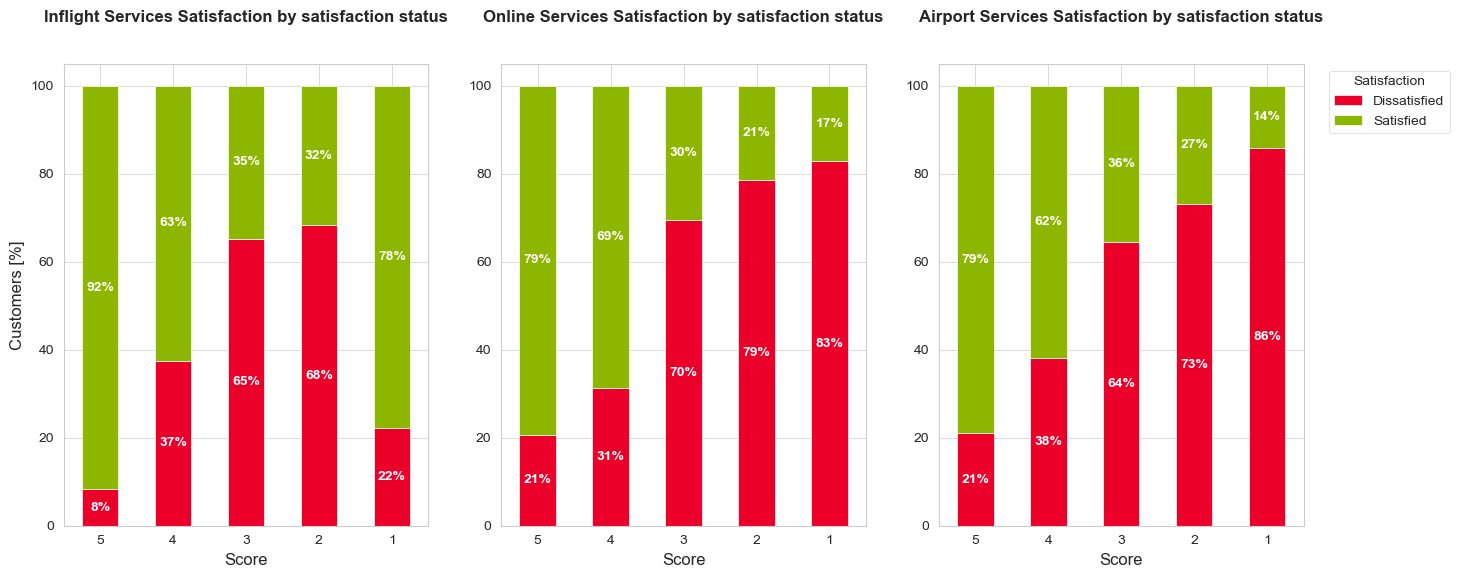

In [23]:
#Creo variables nuevas que generalicen los tipos de features
inflight_services = np.ceil(df[['Seat comfort','Food and drink','Inflight wifi service','Inflight entertainment','Leg room service','Cleanliness','Departure/Arrival time convenient']].mean(axis=1)).astype(int)
online_services = np.ceil(df[['Online support', 'Ease of Online booking','Online boarding']].mean(axis=1)).astype(int)
airport_services = np.ceil(df[['Gate location', 'On-board service','Baggage handling','Checkin service']].mean(axis=1)).astype(int)
df['Inflight services'] = inflight_services
df['Online services'] = online_services
df['Airport services'] = airport_services

#Entiendo las variables creadas en relación a la satisfacción. Creo variables para graficar
infight_nom = df.groupby(['Inflight services','satisfaction']).size().unstack(fill_value=0)
infight_pct = infight_nom.div(infight_nom.sum(axis=1), axis=0) * 100
infight_pct_sort = infight_pct.sort_values(by='Inflight services', ascending = False)

online_nom = df.groupby(['Online services','satisfaction']).size().unstack(fill_value=0)
online_pct = online_nom.div(online_nom.sum(axis=1), axis=0) * 100
online_pct_sort = online_pct.sort_values(by='Online services', ascending = False)

airport_nom = df.groupby(['Airport services','satisfaction']).size().unstack(fill_value=0)
airport_pct = airport_nom.div(airport_nom.sum(axis=1), axis=0) * 100
airport_pct_sort = airport_pct.sort_values(by='Airport services', ascending = False)

# Grafico y contextualizo
sns.set_style("whitegrid")
fig, axes = plt.subplots(1, 3, figsize=(16, 6))

# Grafico Inflight Services
ax1 = infight_pct_sort.plot(kind='bar', stacked=True, color=['#eb0029','#8DB600'], ax=axes[0])
ax1.set_title('Inflight Services Satisfaction by satisfaction status', fontsize=12, fontweight='bold', pad=30)
ax1.set_xlabel('Score', fontsize=12)
ax1.set_ylabel('Customers [%]', fontsize=12)
ax1.legend().set_visible(False)  
ax1.tick_params(axis='x', rotation=0)
for p in ax1.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax1.annotate(f'{height:.0f}%', (x + width/2, y + height/2), ha='center', va='center', fontsize=10, color='white', fontweight='bold')

# Grafico Online Services
ax2 = online_pct_sort.plot(kind='bar', stacked=True, color=['#eb0029','#8DB600'], ax=axes[1])
ax2.set_title('Online Services Satisfaction by satisfaction status', fontsize=12, fontweight='bold', pad=30)
ax2.set_xlabel('Score', fontsize=12)
ax2.legend().set_visible(False)  
ax2.tick_params(axis='x', rotation=0)
for p in ax2.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax2.annotate(f'{height:.0f}%', (x + width/2, y + height/2), ha='center', va='center', fontsize=10, color='white', fontweight='bold')

# Grafico Airport Services
ax3 = airport_pct_sort.plot(kind='bar', stacked=True, color=['#eb0029','#8DB600'], ax=axes[2])
ax3.set_title('Airport Services Satisfaction by satisfaction status', fontsize=12, fontweight='bold', pad=30)
ax3.set_xlabel('Score', fontsize=12)
ax3.legend(title='Satisfaction', bbox_to_anchor=(1.05, 1), loc='upper left')
ax3.tick_params(axis='x', rotation=0)
for p in ax3.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax3.annotate(f'{height:.0f}%', (x + width/2, y + height/2), ha='center', va='center', fontsize=10, color='white', fontweight='bold')

plt.show()


#### <span style="color:gray">**3.5. Tiempos de vuelo y Retrasos**</span>
En el análisis de la industria aérea, se resalta la presencia significativa de problemas operativos, como retrasos de vuelos, pérdida de equipaje y restricciones en la disponibilidad de vuelos. Aunque estos aspectos no son mencionados con la misma frecuencia que los problemas relacionados con costos y tarifas, su influencia en la complejidad operativa es evidente.

Simultáneamente, al examinar nuestros propios datos, observamos que los vuelos más extensos muestran niveles sustanciales de insatisfacción entre los usuarios. Este hallazgo plantea interrogantes sobre la relación entre la satisfacción del cliente, la longitud del vuelo y la elección de la clase de servicio. Específicamente, se indaga sobre la proporción de usuarios satisfechos en vuelos largos que optan por la clase Business y la distribución de usuarios insatisfechos en vuelos cortos entre las clases Business y Economy.

Adicionalmente, se identifica que la duración de los retrasos presenta una dispersión elevada en cada estado de satisfacción. La propuesta de formar clusters basados en los tiempos de retrasos busca entender el comportamiento de cada grupo en relación con la satisfacción. Este enfoque permitirá determinar el punto de quiebre donde los usuarios pasan de estar satisfechos a insatisfechos, proporcionando una perspectiva crucial para abordar de manera efectiva los desafíos operativos y mejorar la experiencia general del usuario.

Distancias [km]
| Satisfacción   |   Min |   Median |   Max |   Mean |   Mode |   DesvStd |
|----------------+-------+----------+-------+--------+--------+-----------|
| Dissatisfied   |    50 |     1955 |  6951 |   2025 |   1963 |       888 |
| Satisfied      |    50 |     1886 |  6950 |   1944 |   1625 |      1127 |

Hay una diferencia de 81 km entre los estados de satisfacción



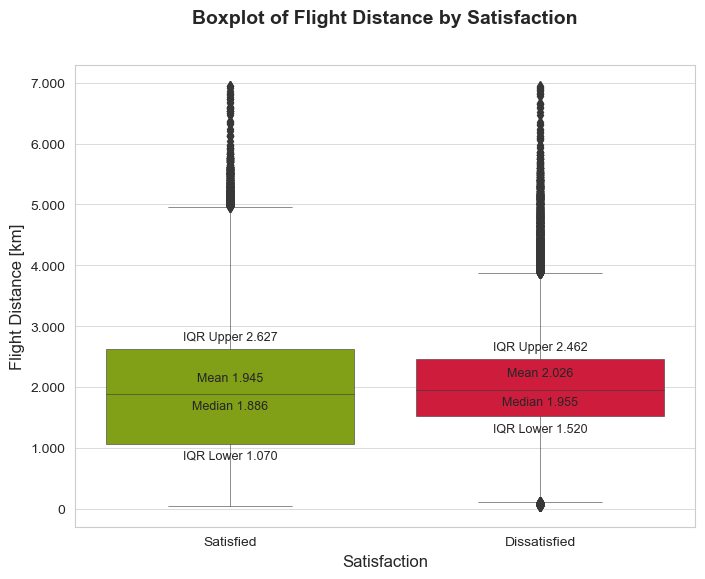

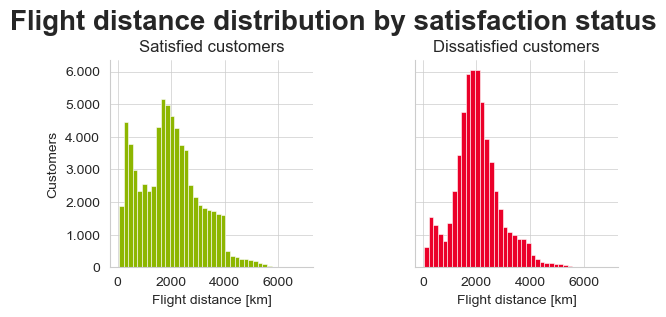

In [22]:
# Me traigo la distancia media por estado de satisfacción
print(Style.BRIGHT+Fore.LIGHTRED_EX+'Distancias [km]'+Style.RESET_ALL)
dist_satisf_mean = df[['satisfaction','Flight Distance']].groupby('satisfaction')['Flight Distance'].mean().astype(int)
dist_satisf_max = df[['satisfaction','Flight Distance']].groupby('satisfaction')['Flight Distance'].max().astype(int)
dist_satisf_min = df[['satisfaction','Flight Distance']].groupby('satisfaction')['Flight Distance'].min().astype(int)
dist_satisf_median = df[['satisfaction','Flight Distance']].groupby('satisfaction')['Flight Distance'].median().astype(int)
dist_satisf_desv = df[['satisfaction','Flight Distance']].groupby('satisfaction')['Flight Distance'].std().astype(int)
dist_satisf_mode = df[['satisfaction','Flight Distance']].groupby('satisfaction')['Flight Distance'].apply(lambda x: x.mode().iat[0].astype(int))

tabla_dist = pd.DataFrame({
    'Satisfacción': dist_satisf_mean.index,
    'Min': dist_satisf_min.values,
    'Median': dist_satisf_median.values,
    'Max': dist_satisf_max.values,
    'Mean': dist_satisf_mean.values,
    'Mode': dist_satisf_mode.values,
    'DesvStd': dist_satisf_desv.values
})

tabla_formateada_dist = tabulate(tabla_dist, headers='keys', tablefmt='orgtbl', showindex=False)
print(tabla_formateada_dist)
print()

dist_dif = np.diff(dist_satisf_mean)[0]
print('Hay una diferencia de',abs(dist_dif.astype(int)),'km entre los estados de satisfacción')
print()

#Grafico y contextualizo
sns.set_style("whitegrid")  

plt.figure(figsize=(8, 6))
ax = sns.boxplot(x='satisfaction', y='Flight Distance', data=df, palette=['#8DB600','#eb0029'], linewidth=0.4)

# Añadir etiquetas para la media, mediana y rangos
for i, satisfaction_level in enumerate(df['satisfaction'].unique()):
    data = df[df['satisfaction'] == satisfaction_level]['Flight Distance']
    mean = data.mean()
    median = data.median()
    lower, upper = data.quantile([0.25, 0.75])
    
    # Etiqueta para la media
    ax.annotate(f'Mean {format_thousands(mean,0)}', xy=(i, mean), xytext=(i, mean+100),
                ha='center', va='bottom',fontsize=9)
    
    # Etiqueta para la mediana
    ax.annotate(f'Median {format_thousands(median,0)}', xy=(i, median), xytext=(i, median-100),
                ha='center', va='top',fontsize=9)
    
    # Etiquetas para los rangos intercuartílicos (IQR)
    ax.annotate(f'IQR Upper {format_thousands(upper,0)}', xy=(i, upper), xytext=(i, upper+300),
                 ha='center', va='top',fontsize=9)
    ax.annotate(f'IQR Lower {format_thousands(lower,0)}', xy=(i, lower), xytext=(i, lower-300),
                 ha='center', va='bottom',fontsize=9)

ax.yaxis.set_major_formatter(FuncFormatter(format_thousands))
    
plt.title("Boxplot of Flight Distance by Satisfaction",fontsize = 14, fontweight = 'bold', pad = 30)
plt.xlabel('Satisfaction')
plt.ylabel('Flight Distance [km]')
plt.show()

#Grafico y contextualizo
sns.set_style("whitegrid")  
paleta_colores = {'Satisfied': '#8DB600' , 'Dissatisfied': '#eb0029'}

ax = sns.FacetGrid(df,
                  col = "satisfaction",  
                  palette = paleta_colores,
                  )
ax.map(sns.histplot, "Flight Distance", bins = 40)

ax.set_titles(template="{col_name} customers", fontsize = 6)

ax.set_axis_labels("Flight distance [km]", "Customers", fontsize = 10)

plt.suptitle("Flight distance distribution by satisfaction status", fontsize=20, fontweight='bold', y=1.05)

for i, row in enumerate(ax.axes):
    for j, col in enumerate(row):
        bars = col.patches
        satisfaction_category = ax.col_names[j]
        color = paleta_colores[satisfaction_category]
        for bar in bars:
            bar.set_facecolor(color)
            
for i, row in enumerate(ax.axes):
    for j, col in enumerate(row):
        col.yaxis.set_major_formatter(FuncFormatter(format_thousands))
        
plt.subplots_adjust(wspace=0.5)

ax = plt.gca()

In [15]:
# Filtra los valores diferentes de 0
df_filtered = df[df['Departure Delay in Minutes'] != 0]

# Calcula las estadísticas
departure_mean = df_filtered[['satisfaction', 'Departure Delay in Minutes']].groupby('satisfaction')['Departure Delay in Minutes'].mean().astype(int)
departure_max = df_filtered[['satisfaction', 'Departure Delay in Minutes']].groupby('satisfaction')['Departure Delay in Minutes'].max().astype(int)
departure_min = df_filtered[['satisfaction', 'Departure Delay in Minutes']].groupby('satisfaction')['Departure Delay in Minutes'].min().astype(int)
departure_median = df_filtered[['satisfaction', 'Departure Delay in Minutes']].groupby('satisfaction')['Departure Delay in Minutes'].median().astype(int)
departure_desv = df_filtered[['satisfaction', 'Departure Delay in Minutes']].groupby('satisfaction')['Departure Delay in Minutes'].std().astype(int)
departure_mode = df_filtered[['satisfaction', 'Departure Delay in Minutes']].groupby('satisfaction')['Departure Delay in Minutes'].apply(lambda x: x.mode().iat[0].astype(int))

# Crea la tabla
tabla_departure = pd.DataFrame({
    'Satisfacción': departure_mean.index,
    'Min': departure_min.values,
    'Median': departure_median.values,
    'Max': departure_max.values,
    'Mean': departure_mean.values,
    'Mode': departure_mode.values,
    'DesvStd': departure_desv.values
})

# Imprime la tabla formateada
print(Style.BRIGHT+Fore.LIGHTRED_EX+'Departure delay [minutes]'+Style.RESET_ALL)
tabla_formateada_departure = tabulate(tabla_departure, headers='keys', tablefmt='orgtbl', showindex=False)
print(tabla_formateada_departure)
print()

departure_dif = np.diff(departure_mean)[0]
print('Hay una diferencia de',abs(departure_dif.astype(int)),'min entre los estados de satisfacción')
print()

#Saco los outliers
Q1 = df_filtered['Departure Delay in Minutes'].quantile(0.25)
Q3 = df_filtered['Departure Delay in Minutes'].quantile(0.75)
IQR = Q3 - Q1

filtered_data = df_filtered[~((df_filtered['Departure Delay in Minutes'] < (Q1 - 1.5 * IQR)) | (df_filtered['Departure Delay in Minutes'] > (Q3 + 1.5 * IQR)))]

# Calcula las estadísticas
departure_mean = filtered_data[['satisfaction', 'Departure Delay in Minutes']].groupby('satisfaction')['Departure Delay in Minutes'].mean().astype(int)
departure_max = filtered_data[['satisfaction', 'Departure Delay in Minutes']].groupby('satisfaction')['Departure Delay in Minutes'].max().astype(int)
departure_min = filtered_data[['satisfaction', 'Departure Delay in Minutes']].groupby('satisfaction')['Departure Delay in Minutes'].min().astype(int)
departure_median = filtered_data[['satisfaction', 'Departure Delay in Minutes']].groupby('satisfaction')['Departure Delay in Minutes'].median().astype(int)
departure_desv = filtered_data[['satisfaction', 'Departure Delay in Minutes']].groupby('satisfaction')['Departure Delay in Minutes'].std().astype(int)
departure_mode = filtered_data[['satisfaction', 'Departure Delay in Minutes']].groupby('satisfaction')['Departure Delay in Minutes'].apply(lambda x: x.mode().iat[0].astype(int))

# Crea la tabla
tabla_departure = pd.DataFrame({
    'Satisfacción': departure_mean.index,
    'Min': departure_min.values,
    'Median': departure_median.values,
    'Max': departure_max.values,
    'Mean': departure_mean.values,
    'Mode': departure_mode.values,
    'DesvStd': departure_desv.values
})

# Imprime la tabla formateada
print(Style.BRIGHT+Fore.LIGHTRED_EX+'Departure delay sin outliers [minutes]'+Style.RESET_ALL)
tabla_formateada_departure = tabulate(tabla_departure, headers='keys', tablefmt='orgtbl', showindex=False)
print(tabla_formateada_departure)
print()

departure_dif = np.diff(departure_mean)[0]
print('Hay una diferencia de',abs(departure_dif.astype(int)),'min entre los estados de satisfacción')
print()


# Filtra los valores diferentes de 0
df_filtered_1 = df[df['Arrival Delay in Minutes'] != 0]

# Calcula las estadísticas
arrival_mean = df_filtered_1[['satisfaction', 'Arrival Delay in Minutes']].groupby('satisfaction')['Arrival Delay in Minutes'].mean().astype(int)
arrival_max = df_filtered_1[['satisfaction', 'Arrival Delay in Minutes']].groupby('satisfaction')['Arrival Delay in Minutes'].max().astype(int)
arrival_min = df_filtered_1[['satisfaction', 'Arrival Delay in Minutes']].groupby('satisfaction')['Arrival Delay in Minutes'].min().astype(int)
arrival_median = df_filtered_1[['satisfaction', 'Arrival Delay in Minutes']].groupby('satisfaction')['Arrival Delay in Minutes'].median().astype(int)
arrival_desv = df_filtered_1[['satisfaction', 'Arrival Delay in Minutes']].groupby('satisfaction')['Arrival Delay in Minutes'].std().astype(int)
arrival_mode = df_filtered_1[['satisfaction', 'Arrival Delay in Minutes']].groupby('satisfaction')['Arrival Delay in Minutes'].apply(lambda x: x.mode().iat[0].astype(int))

# Crea la tabla
tabla_arrival = pd.DataFrame({
    'Satisfacción': arrival_mean.index,
    'Min': arrival_min.values,
    'Median': arrival_median.values,
    'Max': arrival_max.values,
    'Mean': arrival_mean.values,
    'Mode': arrival_mode.values,
    'DesvStd': arrival_desv.values
})

# Imprime la tabla formateada
print(Style.BRIGHT+Fore.LIGHTRED_EX+'Arrival delay [minutes]'+Style.RESET_ALL)
tabla_formateada_arrival = tabulate(tabla_arrival, headers='keys', tablefmt='orgtbl', showindex=False)
print(tabla_formateada_arrival)
print()

arrival_dif = np.diff(arrival_mean)[0]
print('Hay una diferencia de',abs(arrival_dif.astype(int)),'min entre los estados de satisfacción')
print()

#Saco los outliers
Q1_1 = df_filtered_1['Arrival Delay in Minutes'].quantile(0.25)
Q3_1 = df_filtered_1['Arrival Delay in Minutes'].quantile(0.75)
IQR_1 = Q3_1 - Q1_1

filtered_data_1 = df_filtered_1[~((df_filtered_1['Arrival Delay in Minutes'] < (Q1_1 - 1.5 * IQR_1)) | (df_filtered_1['Arrival Delay in Minutes'] > (Q3_1 + 1.5 * IQR_1)))]

# Calcula las estadísticas
arrival_mean = filtered_data_1[['satisfaction', 'Arrival Delay in Minutes']].groupby('satisfaction')['Arrival Delay in Minutes'].mean().astype(int)
arrival_max = filtered_data_1[['satisfaction', 'Arrival Delay in Minutes']].groupby('satisfaction')['Arrival Delay in Minutes'].max().astype(int)
arrival_min = filtered_data_1[['satisfaction', 'Arrival Delay in Minutes']].groupby('satisfaction')['Arrival Delay in Minutes'].min().astype(int)
arrival_median = filtered_data_1[['satisfaction', 'Arrival Delay in Minutes']].groupby('satisfaction')['Arrival Delay in Minutes'].median().astype(int)
arrival_desv = filtered_data_1[['satisfaction', 'Arrival Delay in Minutes']].groupby('satisfaction')['Arrival Delay in Minutes'].std().astype(int)
arrival_mode = filtered_data_1[['satisfaction', 'Arrival Delay in Minutes']].groupby('satisfaction')['Arrival Delay in Minutes'].apply(lambda x: x.mode().iat[0].astype(int))

# Crea la tabla
tabla_arrival = pd.DataFrame({
    'Satisfacción': arrival_mean.index,
    'Min': arrival_min.values,
    'Median': arrival_median.values,
    'Max': arrival_max.values,
    'Mean': arrival_mean.values,
    'Mode': arrival_mode.values,
    'DesvStd': arrival_desv.values
})

# Imprime la tabla formateada
print(Style.BRIGHT+Fore.LIGHTRED_EX+'Arrival delay sin outliers [minutes]'+Style.RESET_ALL)
tabla_formateada_arrival = tabulate(tabla_arrival, headers='keys', tablefmt='orgtbl', showindex=False)
print(tabla_formateada_arrival)
print()

arrival_dif = np.diff(arrival_mean)[0]
print('Hay una diferencia de',abs(arrival_dif.astype(int)),'min entre los estados de satisfacción')
print()


Departure delay [minutes]
| Satisfacción   |   Min |   Median |   Max |   Mean |   Mode |   DesvStd |
|----------------+-------+----------+-------+--------+--------+-----------|
| Dissatisfied   |     1 |       19 |  1592 |     38 |      1 |        57 |
| Satisfied      |     1 |       14 |  1305 |     29 |      1 |        45 |

Hay una diferencia de 9 min entre los estados de satisfacción

Departure delay sin outliers [minutes]
| Satisfacción   |   Min |   Median |   Max |   Mean |   Mode |   DesvStd |
|----------------+-------+----------+-------+--------+--------+-----------|
| Dissatisfied   |     1 |       15 |    91 |     22 |      1 |        21 |
| Satisfied      |     1 |       12 |    91 |     20 |      1 |        20 |

Hay una diferencia de 2 min entre los estados de satisfacción

Arrival delay [minutes]
| Satisfacción   |   Min |   Median |   Max |   Mean |   Mode |   DesvStd |
|----------------+-------+----------+-------+--------+--------+-----------|
| Dissatisfied   |     

### <span style="color:gray">**4. Prediciendo la satisfacción del cliente**</span>

Se comparan los modelos de clasificación de regresión logística y Random Forest.

#### <span style="color:gray">**4.1. Feature selection**</span>

Partiendo de las características mecionadas en el punto 3.4 donde se entendió a priori cómo podrían estar afectando los servicios, se realizó un deep dive en la ponderación de cada uno de los servicios dentro de la satisfacción, donde se puede ver qué más del 50% de la ponderación la tienen los servicios online indicando que son los primeros que deberán ser atacados para mejorar la satisfacción overall de los clientes, en segundo lugar se encuentran los servicios infligt y por último los servicios correspondientes al aeropuerto.
<br> 
De acá se aperturó por todos los features disponibles en la encuesta realizada, donde el 25% de la importancia se encuentra en "inflight entertainment", seguido de la comodidad del asiento, esto puede relacionarse con la cantidad de usuarios en la clase "Eco" y luego la facilidad de sacar un vuelo online.

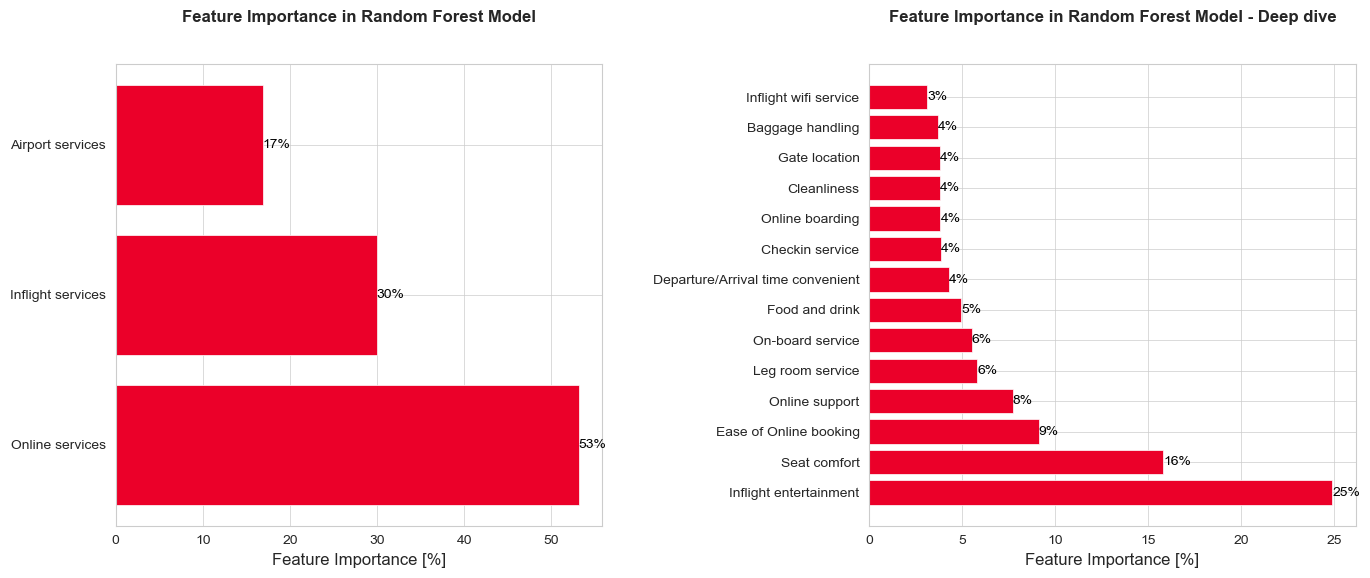

In [25]:
### Características genéricas ###

#Selecciono características más genéricas y la objetivo
feature_names = ['Inflight services','Online services','Airport services']
X = df[feature_names]
y = df['satisf_binaria']

#Divido el conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Creo un modelo de random forest
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

feature_importances = model.feature_importances_
feature_names = X.columns

# Combino las características e importancias y las ordeno
feature_importance_tuples = sorted(zip(feature_names, feature_importances), key=lambda x: x[1], reverse=True)
sorted_feature_names, sorted_feature_importances = zip(*feature_importance_tuples)


### Características desagregadas ###

#Selecciono las características y la variable objetivo para deep dive para las características desagregadas
feature_names_1 = ['Seat comfort', 'Departure/Arrival time convenient', 'Food and drink', 'Gate location',
                   'Inflight wifi service', 'Inflight entertainment', 'Online support', 'Ease of Online booking',
                   'On-board service', 'Leg room service', 'Baggage handling', 'Checkin service', 'Cleanliness',
                   'Online boarding']
X1 = df[feature_names_1]
y1 = df['satisf_binaria']

#Divido el conjunto de datos en entrenamiento y prueba para las características desagregadas
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.2, random_state=42)

#Creo un modelo de random forest para las características desagregadas
model1 = RandomForestClassifier(n_estimators=100, random_state=42)
model1.fit(X1_train, y1_train)

feature_importances_1 = model1.feature_importances_
feature_names_1 = X1.columns

# Combino las características e importancias y las ordeno para las características desagregadas
feature_importance_tuples_1 = sorted(zip(feature_names_1, feature_importances_1), key=lambda x: x[1], reverse=True)
sorted_feature_names_1, sorted_feature_importances_1 = zip(*feature_importance_tuples_1)


### Grafico y contextualizo ###
sns.set_style("whitegrid")
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

#Grafico el primer Random Forest con las características agrupadas
ax1 = axes[0].barh(range(len(sorted_feature_importances)), np.array(sorted_feature_importances) * 100,
                   align='center', color='#EB0029')
axes[0].set_yticks(range(len(sorted_feature_importances)), sorted_feature_names)
axes[0].set_xlabel('Feature Importance [%]', fontsize=12)
axes[0].set_title('Feature Importance in Random Forest Model', fontsize=12, fontweight='bold', pad=30)

for bar, importance in zip(ax1.patches, sorted_feature_importances):
    color = 'black'
    axes[0].text(bar.get_width(), bar.get_y() + bar.get_height() / 2, f'{importance * 100:.0f}%',
                va='center', ha='left', fontsize=10, color=color)

#Grafico el segundo Random Forest con las características desagrupadas
ax2 = axes[1].barh(range(len(sorted_feature_importances_1)), np.array(sorted_feature_importances_1) * 100,
                   align='center', color='#EB0029')
axes[1].set_yticks(range(len(sorted_feature_importances_1)), sorted_feature_names_1)
axes[1].set_xlabel('Feature Importance [%]', fontsize=12)
axes[1].set_title('Feature Importance in Random Forest Model - Deep dive', fontsize=12, fontweight='bold', pad=30)

for bar, importance in zip(ax2.patches, sorted_feature_importances_1):
    color = 'black'
    axes[1].text(bar.get_width(), bar.get_y() + bar.get_height() / 2, f'{importance * 100:.0f}%',
                va='center', ha='left', fontsize=10, color=color)

#Printeo todo
plt.subplots_adjust(wspace=0.55)
plt.show()

#### <span style="color:gray">**4.2. Algorithm selection**</span>
Dado que la interpretabilidad del modelo es crucial y hay que comprender el impacto relativo de cada característica medida, se elige como algoritmo una Regresión Logística, ya que proporciona coeficientes que indican la contribución de cada característica.

###### 4.2.1. Train / Test
Separación del dataset en Grupo de Entrenamiento (80%) y Testeo (20%)

In [26]:
cantidad_registros = df.shape[0]
semilla = 15
np.random.seed(semilla)
serie_random = np.random.rand(cantidad_registros)
df['TRAIN'] = np.where(serie_random < 0.2, 0, 1)

resumen = df.groupby('TRAIN').agg(      
    Cant = ('satisf_binaria', 'count'),
    Cant_Exito = ('satisf_binaria', 'sum'),    
    Tasa_Exito = ('satisf_binaria', 'mean')
).reset_index()
print(resumen)

   TRAIN    Cant  Cant_Exito  Tasa_Exito
0      0   25951       14104    0.543486
1      1  103929       56983    0.548288


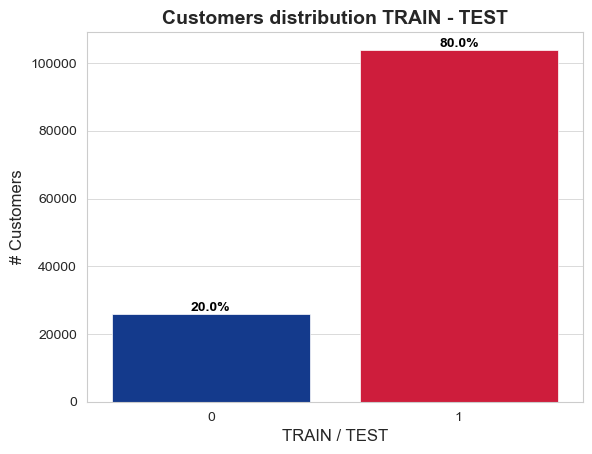

In [27]:
cantidad = len(df['satisf_binaria'])

# Grafico y contextualizo
sns.set_style("whitegrid")
fig, ax = figsize = (16, 6)

sns.countplot(data = df,
              x = "TRAIN",
              palette = colores)
plt.xlabel('TRAIN / TEST')
plt.ylabel('# Customers')
plt.title('Customers distribution TRAIN - TEST',fontsize=14,fontweight='bold')
ax = plt.gca()
for p in ax.patches:
    x_text = p.get_x() + p.get_width() / 2.0  # Calcula la posición x del texto
    y_text = p.get_height()  # Toma la altura de la columna
    ax.text(x_text, y_text, f'{str(round(int(y_text)/cantidad,2) * 100)}%', # Indica posición x e y, y texto a mostrar 
            ha = 'center', # Alineación horizontal 
            va = 'bottom',  # Alineación vertical
            fontsize = 10, color = 'black', fontweight = 'bold')
plt.show()

###### 4.2.2. Variables predictoras

In [28]:
# Genero las variables predictoras
sex_sat = df[['satisf_binaria','Gender']].groupby(by=['Gender']).mean().reset_index()
sex_sat.rename(columns={'satisf_binaria': 'Sex_Sat'}, inplace=True)
df = df.merge(sex_sat,
              left_on = 'Gender',
              right_on = 'Gender',
              how = 'left')

cust_sat = df[['satisf_binaria','Customer Type']].groupby(by=['Customer Type']).mean().reset_index()
cust_sat.rename(columns={'satisf_binaria': 'Customer_Sat'}, inplace=True)
df = df.merge(cust_sat,
              left_on = 'Customer Type',
              right_on = 'Customer Type',
              how = 'left')

travel_sat = df[['satisf_binaria','Type of Travel']].groupby(by=['Type of Travel']).mean().reset_index()
travel_sat.rename(columns={'satisf_binaria': 'Travel_Sat'}, inplace=True)
df = df.merge(travel_sat,
              left_on = 'Type of Travel',
              right_on = 'Type of Travel',
              how = 'left')

class_sat = df[['satisf_binaria','Class']].groupby(by=['Class']).mean().reset_index()
class_sat.rename(columns={'satisf_binaria': 'Class_Sat'}, inplace=True)
df = df.merge(class_sat,
              left_on = 'Class',
              right_on = 'Class',
              how = 'left')

seat_sat = df[['satisf_binaria','Seat comfort']].groupby(by=['Seat comfort']).mean().reset_index()
seat_sat.rename(columns={'satisf_binaria': 'Seat_Sat'}, inplace=True)
df = df.merge(seat_sat,
              left_on = 'Seat comfort',
              right_on = 'Seat comfort',
              how = 'left')

conv_sat = df[['satisf_binaria','Departure/Arrival time convenient']].groupby(by=['Departure/Arrival time convenient']).mean().reset_index()
conv_sat.rename(columns={'satisf_binaria': 'Conv_Sat'}, inplace=True)
df = df.merge(conv_sat,
              left_on = 'Departure/Arrival time convenient',
              right_on = 'Departure/Arrival time convenient',
              how = 'left')


food_sat = df[['satisf_binaria','Food and drink']].groupby(by=['Food and drink']).mean().reset_index()
food_sat.rename(columns={'satisf_binaria': 'Food_Sat'}, inplace=True)
df = df.merge(food_sat,
              left_on = 'Food and drink',
              right_on = 'Food and drink',
              how = 'left')

gate_sat = df[['satisf_binaria','Gate location']].groupby(by=['Gate location']).mean().reset_index()
gate_sat.rename(columns={'satisf_binaria': 'Gate_Sat'}, inplace=True)
df = df.merge(gate_sat,
              left_on = 'Gate location',
              right_on = 'Gate location',
              how = 'left')

wifi_sat = df[['satisf_binaria','Inflight wifi service']].groupby(by=['Inflight wifi service']).mean().reset_index()
wifi_sat.rename(columns={'satisf_binaria': 'Wifi_Sat'}, inplace=True)
df = df.merge(wifi_sat,
              left_on = 'Inflight wifi service',
              right_on = 'Inflight wifi service',
              how = 'left')

enter_sat = df[['satisf_binaria','Inflight entertainment']].groupby(by=['Inflight entertainment']).mean().reset_index()
enter_sat.rename(columns={'satisf_binaria': 'Enter_Sat'}, inplace=True)
df = df.merge(enter_sat,
              left_on = 'Inflight entertainment',
              right_on = 'Inflight entertainment',
              how = 'left')

support_sat = df[['satisf_binaria','Online support']].groupby(by=['Online support']).mean().reset_index()
support_sat.rename(columns={'satisf_binaria': 'Support_Sat'}, inplace=True)
df = df.merge(support_sat,
              left_on = 'Online support',
              right_on = 'Online support',
              how = 'left')

boarding_sat = df[['satisf_binaria','Online boarding']].groupby(by=['Online boarding']).mean().reset_index()
boarding_sat.rename(columns={'satisf_binaria': 'Boarding_Sat'}, inplace=True)
df = df.merge(boarding_sat,
              left_on = 'Online boarding',
              right_on = 'Online boarding',
              how = 'left')

service_sat = df[['satisf_binaria','On-board service']].groupby(by=['On-board service']).mean().reset_index()
service_sat.rename(columns={'satisf_binaria': 'Service_Sat'}, inplace=True)
df = df.merge(service_sat,
              left_on = 'On-board service',
              right_on = 'On-board service',
              how = 'left')

legroom_sat = df[['satisf_binaria','Leg room service']].groupby(by=['Leg room service']).mean().reset_index()
legroom_sat.rename(columns={'satisf_binaria': 'Legroom_Sat'}, inplace=True)
df = df.merge(legroom_sat,
              left_on = 'Leg room service',
              right_on = 'Leg room service',
              how = 'left')

baggage_sat = df[['satisf_binaria','Baggage handling']].groupby(by=['Baggage handling']).mean().reset_index()
baggage_sat.rename(columns={'satisf_binaria': 'Baggage_Sat'}, inplace=True)
df = df.merge(baggage_sat,
              left_on = 'Baggage handling',
              right_on = 'Baggage handling',
              how = 'left')

checkin_sat = df[['satisf_binaria','Checkin service']].groupby(by=['Checkin service']).mean().reset_index()
checkin_sat.rename(columns={'satisf_binaria': 'Checkin_Sat'}, inplace=True)
df = df.merge(checkin_sat,
              left_on = 'Checkin service',
              right_on = 'Checkin service',
              how = 'left')

cleanliness_sat = df[['satisf_binaria','Cleanliness']].groupby(by=['Cleanliness']).mean().reset_index()
cleanliness_sat.rename(columns={'satisf_binaria': 'Cleanliness_Sat'}, inplace=True)
df = df.merge(cleanliness_sat,
              left_on = 'Cleanliness',
              right_on = 'Cleanliness',
              how = 'left')

In [29]:
df = df.rename(columns={'Flight Distance': 'Flight_Distance'})
df = df.rename(columns={'Departure Delay in Minutes': 'Departure_Delay_in_Minutes'})
df['Arrival Delay in Minutes'] = df['Arrival Delay in Minutes'].astype('int64')
df = df.rename(columns={'Arrival Delay in Minutes': 'Arrival_Delay_in_Minutes'})
df['Passenger_ID'] = df.index
df = pd.concat([df['Passenger_ID'], df.drop('Passenger_ID', axis=1)], axis=1)

###### 4.2.3. Modelo 1 - Regresión Logística

In [30]:
# Genero el modelo
formula = "satisf_binaria ~ Sex_Sat + Customer_Sat + Travel_Sat + Class_Sat + Age + Flight_Distance + Departure_Delay_in_Minutes + Arrival_Delay_in_Minutes + Seat_Sat + Conv_Sat + Food_Sat + Gate_Sat + Wifi_Sat + Enter_Sat + Support_Sat + Boarding_Sat + Service_Sat + Legroom_Sat + Baggage_Sat + Checkin_Sat + Cleanliness_Sat"
reg_log = sm.logit(formula, data = df[df['TRAIN']==1]).fit()

# Resumen de los resultados
print(reg_log.summary())

df['Predict_Prob_RegLog'] = reg_log.predict(df)

Optimization terminated successfully.
         Current function value: 0.274456
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:         satisf_binaria   No. Observations:               103929
Model:                          Logit   Df Residuals:                   103907
Method:                           MLE   Df Model:                           21
Date:                Tue, 28 Nov 2023   Pseudo R-squ.:                  0.6014
Time:                        21:28:24   Log-Likelihood:                -28524.
converged:                       True   LL-Null:                       -71553.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept                    -27.4915      0.371    -74.154      0.000     -

Dado que las variables Departure / Arrival delay tienen bajo peso en el modelo (2% cada una) y los coeficientes que las acompañan tienden a 0, se opta por eliminarlas del modelo.
Además, se eliminar la variable "Food and Drinks" dado que el signo del coeficiente no se condice lógicamente con la satisfacción. Se espera que a mejor catering, mejor satisfacción.

In [31]:
formula_2 = "satisf_binaria ~ Sex_Sat + Customer_Sat + Travel_Sat + Class_Sat + Age + Flight_Distance + Seat_Sat + Conv_Sat + Gate_Sat + Wifi_Sat + Enter_Sat + Support_Sat + Boarding_Sat + Service_Sat + Legroom_Sat + Baggage_Sat + Checkin_Sat + Cleanliness_Sat"
reg_log_2 = sm.logit(formula_2, data = df[df['TRAIN']==1]).fit()

# Resumen de los resultados
print(reg_log_2.summary())

df['Predict_Prob_RegLog'] = reg_log.predict(df)

Optimization terminated successfully.
         Current function value: 0.277322
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:         satisf_binaria   No. Observations:               103929
Model:                          Logit   Df Residuals:                   103910
Method:                           MLE   Df Model:                           18
Date:                Tue, 28 Nov 2023   Pseudo R-squ.:                  0.5972
Time:                        21:28:26   Log-Likelihood:                -28822.
converged:                       True   LL-Null:                       -71553.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept         -28.1552      0.367    -76.694      0.000     -28.875     -27.436
Sex_Sat       

In [32]:
# Coeficientes y p valores
coeficientes = reg_log_2.params
pvalores = reg_log_2.pvalues
print("")
print(Style.BRIGHT+Fore.LIGHTRED_EX+"Coeficientes"+Style.RESET_ALL)
print(coeficientes.round(4))
print("")
print(Style.BRIGHT+Fore.LIGHTRED_EX+"P-Values"+Style.RESET_ALL)
print(pvalores.round(6))


Coeficientes
Intercept         -28.1552
Sex_Sat             4.7638
Customer_Sat        6.8410
Travel_Sat         12.4703
Class_Sat           2.4911
Age                -0.0048
Flight_Distance    -0.0001
Seat_Sat            5.6511
Conv_Sat            5.3121
Gate_Sat           -0.9887
Wifi_Sat            0.4658
Enter_Sat           3.1982
Support_Sat         1.2754
Boarding_Sat        1.3262
Service_Sat         2.3146
Legroom_Sat         2.4243
Baggage_Sat         1.5055
Checkin_Sat         2.3036
Cleanliness_Sat     1.6856
dtype: float64

P-Values
Intercept          0.000000
Sex_Sat            0.000000
Customer_Sat       0.000000
Travel_Sat         0.000000
Class_Sat          0.000000
Age                0.000000
Flight_Distance    0.000000
Seat_Sat           0.000000
Conv_Sat           0.000000
Gate_Sat           0.000000
Wifi_Sat           0.000009
Enter_Sat          0.000000
Support_Sat        0.000000
Boarding_Sat       0.000000
Service_Sat        0.000000
Legroom_Sat        0.000000


In [33]:
# Predicciones 
df['Predict_Prob_RegLog'] = reg_log_2.predict(df)

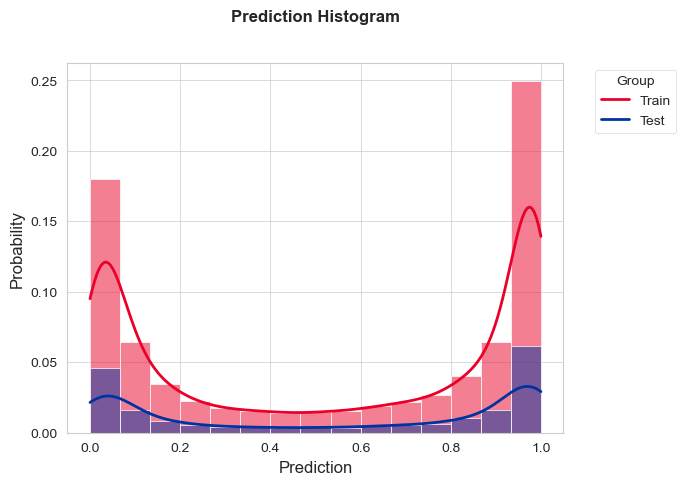

In [34]:
# Grafico y contextualizo
sns.set_style("whitegrid")
fig, ax = figsize = (16, 6)

ax = sns.histplot(data = df,
                  x = 'Predict_Prob_RegLog',  
                  bins = 15,
                  alpha = 0.5,
                  kde = True,
                  stat = 'probability', 
                  hue = 'TRAIN',
                  palette = colores
                  )

ax.set_title('Prediction Histogram', fontsize=12, fontweight='bold', pad=30) 
ax.set_xlabel('Prediction', fontsize=12)
ax.legend(title='Group', bbox_to_anchor=(1.05, 1), loc='upper left', labels=['Train', 'Test'])
plt.show()

###### 4.2.3.1. Matriz de confusión

Matriz de Confusión en entrenamiento
[[39392  7554]
 [ 4056 52927]]

Matriz de Confusión en testeo
[[ 9955  1892]
 [  997 13107]]



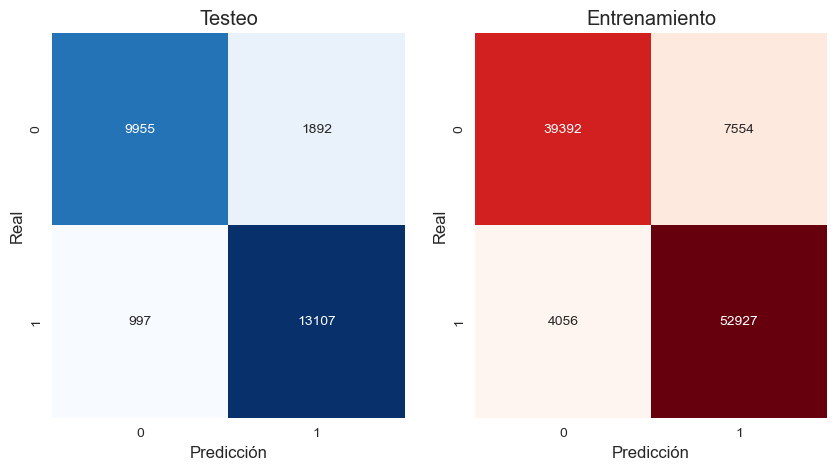

In [35]:
# Clasifico a los pasajeros según las predicciones usando un corte de 40% para deinir la clasificación de satisfacción
df['Satisf_Pred'] = np.where(df['Predict_Prob_RegLog'] > 0.4, 1, 0)

# Calculo la matriz de confusión para test y train
confusion_entrenamiento = confusion_matrix(df[df['TRAIN'] == 1]['satisf_binaria'], 
                                           df[df['TRAIN'] == 1]['Satisf_Pred'])

confusion_test = confusion_matrix(df[df['TRAIN'] == 0]['satisf_binaria'], 
                                    df[df['TRAIN'] == 0]['Satisf_Pred'])

print(Style.BRIGHT+Fore.LIGHTRED_EX+"Matriz de Confusión en entrenamiento"+Style.RESET_ALL)
print(confusion_entrenamiento)
print()
print(Style.BRIGHT+Fore.LIGHTRED_EX+"Matriz de Confusión en testeo"+Style.RESET_ALL)
print(confusion_test)
print()

# Grafico y contextualizo
fig, ax = plt.subplots(nrows = 1,
                      ncols = 2,
                      figsize = (10,5)) 

sns.heatmap(confusion_test, 
            annot=True, fmt='d', cmap='Blues', cbar=False, 
            ax=ax[0])
ax[0].set_title('Testeo')
ax[0].set_xlabel('Predicción')
ax[0].set_ylabel('Real')

sns.heatmap(confusion_entrenamiento, 
            annot=True, fmt='d', cmap='Reds', cbar=False, 
            ax=ax[1])
ax[1].set_title('Entrenamiento')
ax[1].set_xlabel('Predicción')
ax[1].set_ylabel('Real')

plt.show()

###### 4.2.3.2. Métricas derivadas de la matriz de confusión

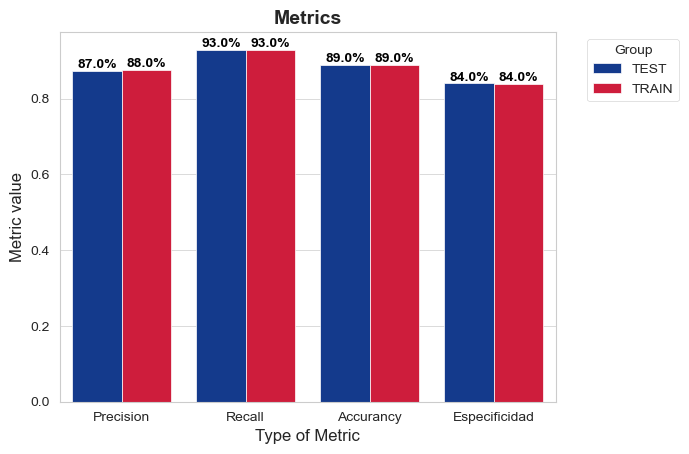

In [36]:
# Tomo los valores de la matriz de confusión
Total_TEST = sum(sum(confusion_test))
Total_TRAIN = sum(sum(confusion_entrenamiento))
TP_TEST = confusion_test[1,1]
TP_TRAIN = confusion_entrenamiento[1,1]
TN_TEST = confusion_test[0,0]
TN_TRAIN = confusion_entrenamiento[0,0]
FP_TEST = confusion_test[0,1]
FP_TRAIN = confusion_entrenamiento[0,1]
FN_TEST = confusion_test[1,0]
FN_TRAIN = confusion_entrenamiento[1,0]

# Calculo las métricas
Precision_TEST = TP_TEST / (TP_TEST + FP_TEST)
Precision_TRAIN = TP_TRAIN / (TP_TRAIN + FP_TRAIN)
Recall_TEST = TP_TEST / (TP_TEST + FN_TEST)
Recall_TRAIN = TP_TRAIN / (TP_TRAIN + FN_TRAIN)
Accurancy_TEST = (TP_TEST + TN_TEST) / Total_TEST
Accurancy_TRAIN = (TP_TRAIN + TN_TRAIN) / Total_TRAIN
Especificidad_TEST = TN_TEST / (TN_TEST + FP_TEST)
Especificidad_TRAIN = TN_TRAIN / (TN_TRAIN + FP_TRAIN)

# Presento todo en una misma tabla 
metricas = pd.DataFrame(columns=['Population', 'Metric','Value'])

# Precisión
nuevo_dato = {'Population': 'TEST', 
              'Metric': 'Precision',
              'Value': Precision_TEST}
metricas = pd.concat([metricas, pd.DataFrame([nuevo_dato])], ignore_index=True)
nuevo_dato = {'Population': 'TRAIN', 
              'Metric': 'Precision',
              'Value': Precision_TRAIN}
metricas = pd.concat([metricas, pd.DataFrame([nuevo_dato])], ignore_index=True)

# Recall
nuevo_dato = {'Population': 'TEST', 
              'Metric': 'Recall',
              'Value': Recall_TEST}
metricas = pd.concat([metricas, pd.DataFrame([nuevo_dato])], ignore_index=True)
nuevo_dato = {'Population': 'TRAIN', 
              'Metric': 'Recall',
              'Value': Recall_TRAIN}
metricas = pd.concat([metricas, pd.DataFrame([nuevo_dato])], ignore_index=True)

# Accurancy
nuevo_dato = {'Population': 'TEST', 
              'Metric': 'Accurancy',
              'Value': Accurancy_TEST}
metricas = pd.concat([metricas, pd.DataFrame([nuevo_dato])], ignore_index=True)
nuevo_dato = {'Population': 'TRAIN', 
              'Metric': 'Accurancy',
              'Value': Accurancy_TRAIN}
metricas = pd.concat([metricas, pd.DataFrame([nuevo_dato])], ignore_index=True)

# Especificidad
nuevo_dato = {'Population': 'TEST', 
              'Metric': 'Especificidad',
              'Value': Especificidad_TEST}
metricas = pd.concat([metricas, pd.DataFrame([nuevo_dato])], ignore_index=True)
nuevo_dato = {'Population': 'TRAIN', 
              'Metric': 'Especificidad',
              'Value': Especificidad_TRAIN}
metricas = pd.concat([metricas, pd.DataFrame([nuevo_dato])], ignore_index=True)

# Grafico y contextualizo 
sns.set_style("whitegrid")
fig, ax = figsize = (20, 8)

sns.barplot(data = metricas,
                x = 'Metric',
                y = 'Value',
                hue = 'Population',
                palette=colores)
plt.xlabel('Type of Metric')
plt.ylabel('Metric value')
plt.title('Metrics',fontsize=14,fontweight='bold')
ax = plt.gca()
for p in ax.patches:
    x_text = p.get_x() + p.get_width() / 2.0 
    y_text = p.get_height()  
    ax.text(x_text, y_text, f'{str(round(y_text,2) * 100)}%',  
            ha = 'center', 
            va = 'bottom', 
            fontsize = 10, color = 'black', fontweight = 'bold')
    
plt.legend(title='Group', bbox_to_anchor=(1.05, 1), loc='upper left')    
metricas_1 = plt.gcf()
plt.show()

###### 4.2.3.3. Curva ROC

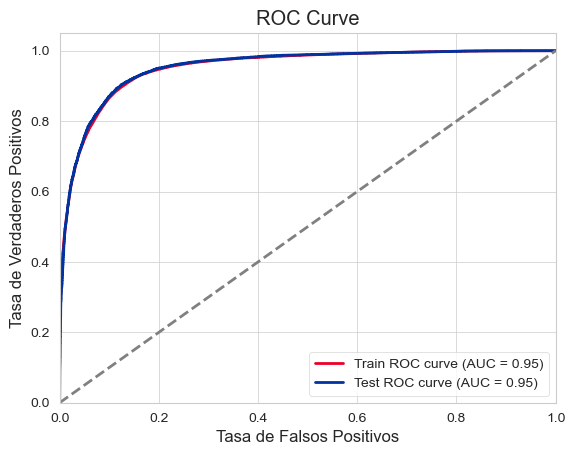

In [37]:
y_train = df.loc[df['TRAIN'] == 1,'satisf_binaria']
y_train_proba = df.loc[df['TRAIN'] == 1,'Predict_Prob_RegLog']
fpr_train, tpr_train, _ = roc_curve(y_train, y_train_proba)
roc_auc_train = auc(fpr_train, tpr_train)

y_test = df.loc[df['TRAIN'] == 0,'satisf_binaria']
y_test_proba = df.loc[df['TRAIN'] == 0,'Predict_Prob_RegLog']
fpr_test, tpr_test, _ = roc_curve(y_test, y_test_proba)
roc_auc_test = auc(fpr_test, tpr_test)

# Grafico y contextualizo
sns.set_style("whitegrid")
fig = figsize = (16, 6)

plt.plot(fpr_train, tpr_train, color='#eb0029', lw=2, label=f'Train ROC curve (AUC = {roc_auc_train:.2f})')
plt.plot(fpr_test, tpr_test, color='#0033a0', lw=2, label=f'Test ROC curve (AUC = {roc_auc_test:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('ROC Curve')
plt.legend(loc='lower right')
roc_1 = plt.gcf()
plt.show()

###### 4.2.4. Modelo 2 - Random Forest

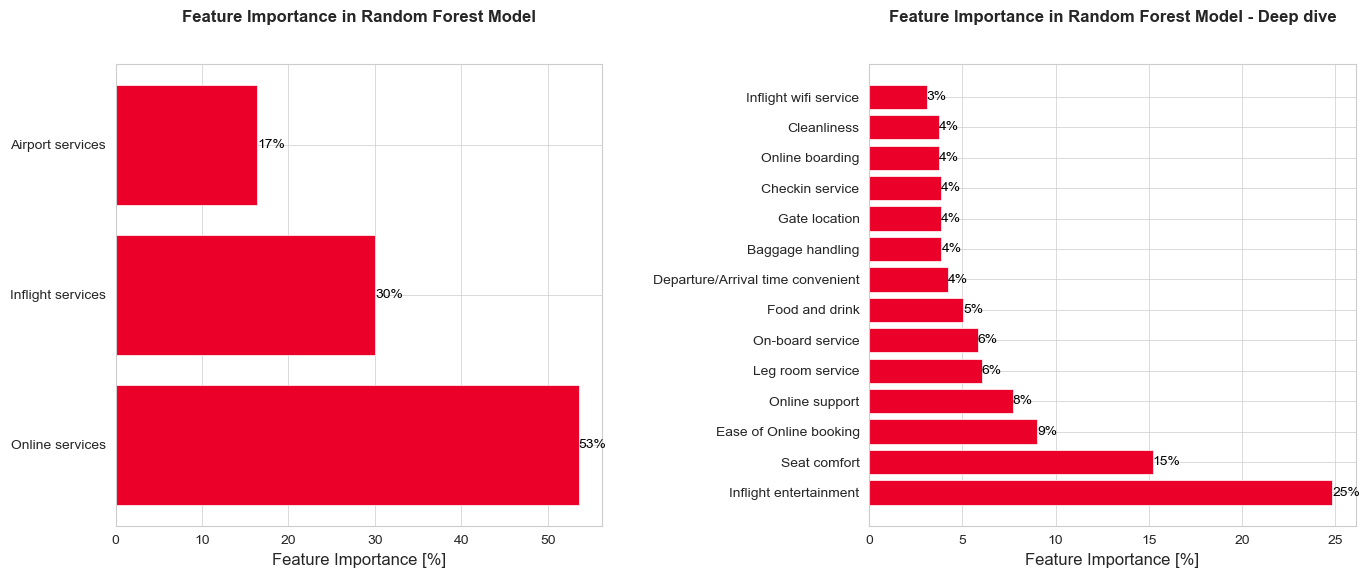

In [42]:
### Características genéricas ###

#Selecciono características más genéricas y la objetivo
feature_names = ['Inflight services','Online services','Airport services']
X = df[feature_names]
y = df['satisf_binaria']

# Filtro el conjunto de datos para obtener conjuntos de entrenamiento y prueba
X_train = X[df['TRAIN'] == 1]
y_train = y[df['TRAIN'] == 1]
X_test = X[df['TRAIN'] == 0]
y_test = y[df['TRAIN'] == 0]

#Creo un modelo de random forest
model_rf = RandomForestClassifier(n_estimators=100, random_state=42)
model_rf.fit(X_train, y_train)

feature_importances_rf = model_rf.feature_importances_

feature_names = X.columns

# Combino las características e importancias y las ordeno
feature_importance_tuples_rf = sorted(zip(feature_names, feature_importances_rf), key=lambda x: x[1], reverse=True)
sorted_feature_names_rf, sorted_feature_importances_rf = zip(*feature_importance_tuples_rf)


### Características desagregadas ###

#Selecciono las características y la variable objetivo para deep dive para las características desagregadas
feature_names_1 = ['Seat comfort', 'Departure/Arrival time convenient', 'Food and drink', 'Gate location',
                   'Inflight wifi service', 'Inflight entertainment', 'Online support', 'Ease of Online booking',
                   'On-board service', 'Leg room service', 'Baggage handling', 'Checkin service', 'Cleanliness',
                   'Online boarding']
X1 = df[feature_names_1]
y1 = df['satisf_binaria']

# Filtro el conjunto de datos para obtener conjuntos de entrenamiento y prueba
X1_train = X1[df['TRAIN'] == 1]
y1_train = y1[df['TRAIN'] == 1]
X1_test = X1[df['TRAIN'] == 0]
y1_test = y1[df['TRAIN'] == 0]

#Creo un modelo de random forest para las características desagregadas
model1_rf = RandomForestClassifier(n_estimators=100, random_state=42)
model1_rf.fit(X1_train, y1_train)

feature_importances_1_rf = model1_rf.feature_importances_

feature_names_1 = X1.columns

# Combino las características e importancias y las ordeno para las características desagregadas
feature_importance_tuples_1_rf = sorted(zip(feature_names_1, feature_importances_1_rf), key=lambda x: x[1], reverse=True)
sorted_feature_names_1_rf, sorted_feature_importances_1_rf = zip(*feature_importance_tuples_1_rf)


### Grafico y contextualizo ###

sns.set_style("whitegrid")
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

ax1 = axes[0].barh(range(len(sorted_feature_importances_rf)), np.array(sorted_feature_importances_rf) * 100,
                   align='center', color='#EB0029')
axes[0].set_yticks(range(len(sorted_feature_importances_rf)), sorted_feature_names_rf)
axes[0].set_xlabel('Feature Importance [%]', fontsize=12)
axes[0].set_title('Feature Importance in Random Forest Model', fontsize=12, fontweight='bold', pad=30)

for bar, importance in zip(ax1.patches, sorted_feature_importances):
    color = 'black'
    axes[0].text(bar.get_width(), bar.get_y() + bar.get_height() / 2, f'{importance * 100:.0f}%',
                va='center', ha='left', fontsize=10, color=color)

ax2 = axes[1].barh(range(len(sorted_feature_importances_1_rf)), np.array(sorted_feature_importances_1_rf) * 100,
                   align='center', color='#EB0029')
axes[1].set_yticks(range(len(sorted_feature_importances_1_rf)), sorted_feature_names_1_rf)
axes[1].set_xlabel('Feature Importance [%]', fontsize=12)
axes[1].set_title('Feature Importance in Random Forest Model - Deep dive', fontsize=12, fontweight='bold', pad=30)

for bar, importance in zip(ax2.patches, sorted_feature_importances_1_rf):
    color = 'black'
    axes[1].text(bar.get_width(), bar.get_y() + bar.get_height() / 2, f'{importance * 100:.0f}%',
                va='center', ha='left', fontsize=10, color=color)
    
plt.subplots_adjust(wspace=0.55)
plt.show()

###### 4.2.3.1. Matriz de confusión

Matriz de Confusión en entrenamiento
[[31852 15094]
 [10051 46932]]

Matriz de Confusión en testeo
[[ 8069  3778]
 [ 2517 11587]]



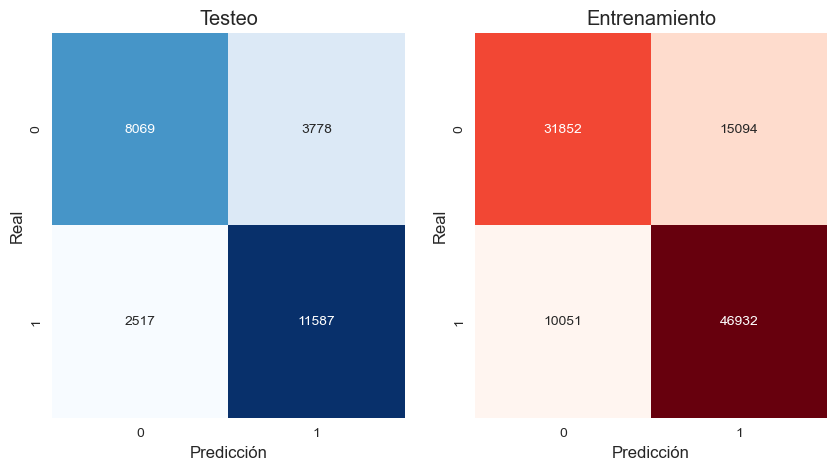

In [43]:
# Clasifico a los pasajeros según las predicciones del modelo de Random Forest usando un corte de 0.4 para definir la clasificación de satisfacción
df['Satisf_Pred_RF'] = np.where(model_rf.predict_proba(X)[:, 1] > 0.4, 1, 0)

# Calculo la matriz de confusión para test y train
confusion_entrenamiento_rf = confusion_matrix(y_train, model_rf.predict(X_train))
confusion_test_rf = confusion_matrix(y_test, model_rf.predict(X_test))

print(Style.BRIGHT + Fore.LIGHTRED_EX + "Matriz de Confusión en entrenamiento" + Style.RESET_ALL)
print(confusion_entrenamiento_rf)
print()
print(Style.BRIGHT + Fore.LIGHTRED_EX + "Matriz de Confusión en testeo" + Style.RESET_ALL)
print(confusion_test_rf)
print()

# Grafico y contextualizo
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))

sns.heatmap(confusion_test_rf,
            annot=True, fmt='d', cmap='Blues', cbar=False,
            ax=ax[0])
ax[0].set_title('Testeo')
ax[0].set_xlabel('Predicción')
ax[0].set_ylabel('Real')

sns.heatmap(confusion_entrenamiento_rf,
            annot=True, fmt='d', cmap='Reds', cbar=False,
            ax=ax[1])
ax[1].set_title('Entrenamiento')
ax[1].set_xlabel('Predicción')
ax[1].set_ylabel('Real')

plt.show()


###### 4.2.3.2. Métricas derivadas de la matriz de confusión

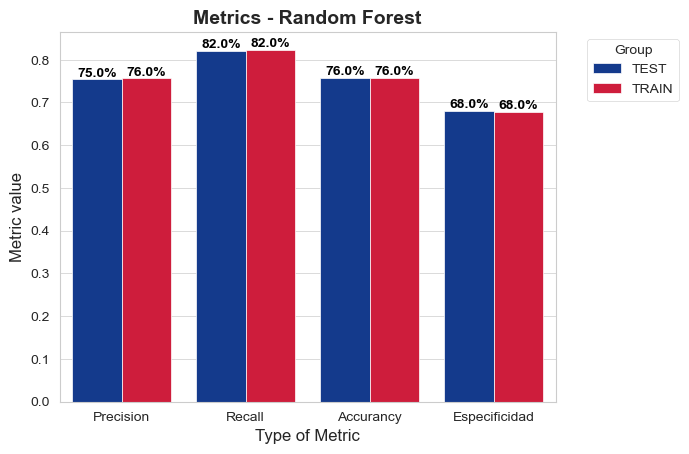

In [44]:
# Tomo los valores de la matriz de confusión para Random Forest
Total_TEST_RF = sum(sum(confusion_test_rf))
Total_TRAIN_RF = sum(sum(confusion_entrenamiento_rf))
TP_TEST_RF = confusion_test_rf[1, 1]
TP_TRAIN_RF = confusion_entrenamiento_rf[1, 1]
TN_TEST_RF = confusion_test_rf[0, 0]
TN_TRAIN_RF = confusion_entrenamiento_rf[0, 0]
FP_TEST_RF = confusion_test_rf[0, 1]
FP_TRAIN_RF = confusion_entrenamiento_rf[0, 1]
FN_TEST_RF = confusion_test_rf[1, 0]
FN_TRAIN_RF = confusion_entrenamiento_rf[1, 0]

# Calculo las métricas para Random Forest
Precision_TEST_RF = TP_TEST_RF / (TP_TEST_RF + FP_TEST_RF)
Precision_TRAIN_RF = TP_TRAIN_RF / (TP_TRAIN_RF + FP_TRAIN_RF)
Recall_TEST_RF = TP_TEST_RF / (TP_TEST_RF + FN_TEST_RF)
Recall_TRAIN_RF = TP_TRAIN_RF / (TP_TRAIN_RF + FN_TRAIN_RF)
Accurancy_TEST_RF = (TP_TEST_RF + TN_TEST_RF) / Total_TEST_RF
Accurancy_TRAIN_RF = (TP_TRAIN_RF + TN_TRAIN_RF) / Total_TRAIN_RF
Especificidad_TEST_RF = TN_TEST_RF / (TN_TEST_RF + FP_TEST_RF)
Especificidad_TRAIN_RF = TN_TRAIN_RF / (TN_TRAIN_RF + FP_TRAIN_RF)

# Presento todo en una misma tabla para Random Forest
metricas_rf = pd.DataFrame(columns=['Population', 'Metric', 'Value'])

# Precisión
nuevo_dato_rf = {'Population': 'TEST',
                 'Metric': 'Precision',
                 'Value': Precision_TEST_RF}
metricas_rf = pd.concat([metricas_rf, pd.DataFrame([nuevo_dato_rf])], ignore_index=True)
nuevo_dato_rf = {'Population': 'TRAIN',
                 'Metric': 'Precision',
                 'Value': Precision_TRAIN_RF}
metricas_rf = pd.concat([metricas_rf, pd.DataFrame([nuevo_dato_rf])], ignore_index=True)

# Recall
nuevo_dato_rf = {'Population': 'TEST',
                 'Metric': 'Recall',
                 'Value': Recall_TEST_RF}
metricas_rf = pd.concat([metricas_rf, pd.DataFrame([nuevo_dato_rf])], ignore_index=True)
nuevo_dato_rf = {'Population': 'TRAIN',
                 'Metric': 'Recall',
                 'Value': Recall_TRAIN_RF}
metricas_rf = pd.concat([metricas_rf, pd.DataFrame([nuevo_dato_rf])], ignore_index=True)

# Accurancy
nuevo_dato_rf = {'Population': 'TEST',
                 'Metric': 'Accurancy',
                 'Value': Accurancy_TEST_RF}
metricas_rf = pd.concat([metricas_rf, pd.DataFrame([nuevo_dato_rf])], ignore_index=True)
nuevo_dato_rf = {'Population': 'TRAIN',
                 'Metric': 'Accurancy',
                 'Value': Accurancy_TRAIN_RF}
metricas_rf = pd.concat([metricas_rf, pd.DataFrame([nuevo_dato_rf])], ignore_index=True)

# Especificidad
nuevo_dato_rf = {'Population': 'TEST',
                 'Metric': 'Especificidad',
                 'Value': Especificidad_TEST_RF}
metricas_rf = pd.concat([metricas_rf, pd.DataFrame([nuevo_dato_rf])], ignore_index=True)
nuevo_dato_rf = {'Population': 'TRAIN',
                 'Metric': 'Especificidad',
                 'Value': Especificidad_TRAIN_RF}
metricas_rf = pd.concat([metricas_rf, pd.DataFrame([nuevo_dato_rf])], ignore_index=True)

# Grafico y contextualizo para Random Forest
sns.set_style("whitegrid")
fig, ax = figsize = (20, 8)

sns.barplot(data=metricas_rf,
            x='Metric',
            y='Value',
            hue='Population',
            palette=colores)
plt.xlabel('Type of Metric')
plt.ylabel('Metric value')
plt.title('Metrics - Random Forest', fontsize=14, fontweight='bold')
ax = plt.gca()
for p in ax.patches:
    x_text = p.get_x() + p.get_width() / 2.0
    y_text = p.get_height()
    ax.text(x_text, y_text, f'{str(round(y_text,2) * 100)}%',
            ha='center',
            va='bottom',
            fontsize=10, color='black', fontweight='bold')

plt.legend(title='Group', bbox_to_anchor=(1.05, 1), loc='upper left')
metricas_rf_plot = plt.gcf()
plt.show()


###### 4.2.3.3. Curva ROC

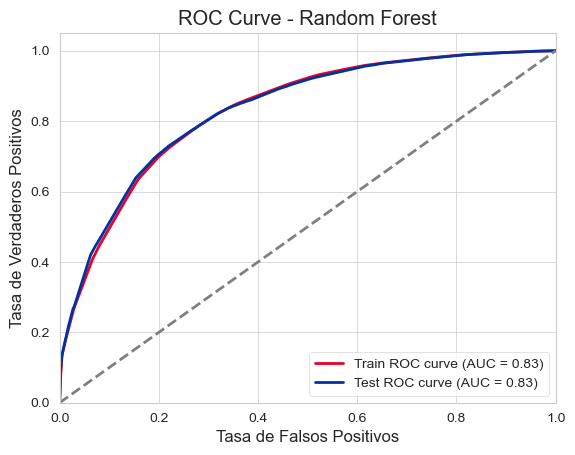

In [45]:
y_train_rf = df.loc[df['TRAIN'] == 1, 'satisf_binaria']
y_train_proba_rf = model_rf.predict_proba(X_train)[:, 1]
fpr_train_rf, tpr_train_rf, _ = roc_curve(y_train_rf, y_train_proba_rf)
roc_auc_train_rf = auc(fpr_train_rf, tpr_train_rf)

y_test_rf = df.loc[df['TRAIN'] == 0, 'satisf_binaria']
y_test_proba_rf = model_rf.predict_proba(X_test)[:, 1]
fpr_test_rf, tpr_test_rf, _ = roc_curve(y_test_rf, y_test_proba_rf)
roc_auc_test_rf = auc(fpr_test_rf, tpr_test_rf)

# Grafico y contextualizo para Random Forest
sns.set_style("whitegrid")
fig = figsize = (16, 6)

plt.plot(fpr_train_rf, tpr_train_rf, color='#eb0029', lw=2, label=f'Train ROC curve (AUC = {roc_auc_train_rf:.2f})')
plt.plot(fpr_test_rf, tpr_test_rf, color='#0033a0', lw=2, label=f'Test ROC curve (AUC = {roc_auc_test_rf:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('ROC Curve - Random Forest')
plt.legend(loc='lower right')
roc_rf_plot = plt.gcf()
plt.show()

#### <span style="color:gray">**4.4. Conclusiones y elección del Modelo**</span>

El modelo de regresión logística y el modelo de Random Forest fueron sometidos a un análisis exhaustivo para evaluar su desempeño en la predicción de la satisfacción de los clientes de la aerolínea.

En el caso del modelo de regresión logística, los 18 coeficientes asociados a las variables predictoras demostraron una significancia estadística robusta con un valor p igual a 0, respaldando la solidez de las relaciones identificadas. Este modelo exhibe un rendimiento excepcional, logrando una precisión del 88% en el conjunto de entrenamiento (TRAIN) y del 87% en el conjunto de prueba (TEST). La Recall se mantiene fuerte en ambos conjuntos con un 93%, indicando la capacidad del modelo para identificar correctamente las instancias positivas.

Es destacable la consistencia en las métricas entre TRAIN y TEST, con precisiones, Recall, exactitud (Accuracy) y especificidad alrededor del 89%, resaltando la capacidad de generalización del modelo en datos no vistos.

La curva ROC del modelo de regresión logística, desviada marcadamente hacia la esquina superior izquierda y un área bajo la curva (AUC) de 0.95 en ambos conjuntos, evidencian una capacidad discriminativa excepcional.

En contraste, el modelo de Random Forest presenta métricas ligeramente inferiores. La precisión en TRAIN y TEST es del 76% y 75%, respectivamente, con una Recall constante en el 82%. La exactitud y especificidad se mantienen en el 76% y 68%, respectivamente, en ambos conjuntos. La curva ROC, aunque desviada hacia la esquina superior izquierda, forma un semicírculo menos amplio, reflejando una discriminación ligeramente inferior. El AUC, aunque sólido con 0.83 en ambos conjuntos, muestra una eficacia discriminativa algo menor en comparación con el modelo de regresión logística.

En resumen, mientras que el modelo de regresión logística destaca por su precisión, generalización y capacidad discriminativa excepcional, el modelo de Random Forest muestra un rendimiento sólido, aunque ligeramente inferior en algunas métricas. Por lo tanto, dado que el modelo de regresión demuestra una capacidad superior para predecir la satisfacción en comparación con el modelo de Random Forest y, si bien el modelo de Random Forest presenta un rendimiento sólido, las métricas superiores del modelo de regresión logística, junto con su capacidad de generalización y discriminación excepcionales, hacen que sea la elección preferida en términos de rendimiento global.

### <span style="color:gray">**5. Conclusiones y Next Steps**</span>
En el contexto más amplio de la industria aérea, los desafíos que enfrenta Invistico Airlines reflejan tendencias generales observadas en el sector. La presión económica, los altos costos y tarifas, así como los problemas operativos, son factores comunes que afectan la satisfacción del cliente en toda la industria. La disminución en la satisfacción, especialmente en segmentos como economy/basic economy, resuena con la tendencia general de una caída en la satisfacción de los clientes en aerolíneas.

La importancia de la lealtad del cliente, destacada en el estudio de Leon, Dixon y colaboradores, encuentra paralelos en la situación de Invistico, donde los usuarios leales representan el 80% de la encuesta. Sin embargo, a pesar de la lealtad, los niveles de satisfacción aún están por debajo del objetivo establecido, subrayando la necesidad de mejorar la experiencia del usuario para garantizar la retención a largo plazo.

La segmentación por clases de viaje y su impacto en la satisfacción refleja la realidad de la industria, donde ciertos segmentos, como first/business, experimentan niveles más altos de satisfacción en comparación con economy/basic economy. Esta disparidad resalta la importancia de estrategias específicas para abordar las preocupaciones de cada segmento de clientes, un enfoque que también se sugiere para Invistico Airlines.

La influencia de los servicios online y del aeropuerto en la satisfacción general del cliente, identificada en el análisis de la industria, se alinea con la recomendación de enfocar las estrategias en áreas específicas, como servicios online y del aeropuerto, en el caso de Invistico. Mejorar la eficiencia y calidad en estas dimensiones puede tener un impacto positivo en la percepción global de los clientes.

Finalmente, la exploración de la relación entre la duración de los vuelos y la satisfacción del cliente, así como el análisis de los tiempos de retraso, coincide con la preocupación general en la industria aérea por problemas operativos, incluidos los retrasos. La propuesta de formar clusters basados en los tiempos de retrasos muestra un enfoque proactivo para comprender el comportamiento de los usuarios y abordar los desafíos operativos de manera más efectiva, un aspecto crucial en el panorama general de la industria. En conjunto, estas correlaciones subrayan la importancia de estrategias personalizadas y focalizadas para mejorar la satisfacción del cliente tanto en Invistico Airlines como en la industria aérea en su conjunto.